In [19]:
# SUMMARY
# A - Data load
# B - DATA CHECKS
# C - DATA ENRICHMENTS - match countries & city characteristics
# D - DATA CATEGORISATION - create categories
# E - STATS & CORRELATIONS

In [20]:
# -------------------------------------------- #
# A - Data load
# -------------------------------------------- #

import unicodecsv
import pandas as pd

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
people_filename = '../data/people.csv'
people = read_csv(people_filename)

people[0]

{'10': 'Related to transport (flying cars, etc)',
 '10.Innovation': 'Cars, Transport, City, Journey, , , , , , , , , , , ',
 '13': 'Other',
 '13.Fear': 'Future, Children, Technology, Obsession, Self-centered, , , , , , , , , , ',
 '14': 'Dream for the World',
 '14.Dream': 'Good, Generosity, Health, Inequality, , , , , , , , , , , ',
 '15.1': 'Neutral',
 '15.2': 'Technology / Advancements',
 '15.2100': 'Black, Green, Fast, Connected, Devices, , , , , , , , , , ',
 '16': '',
 '16.Beauty': 'KO',
 '18': '',
 '18.God': 'KO',
 '19': '',
 '19.Culture': 'KO',
 '24': '',
 '24.OVNI': 'KO',
 '3.1': 'Non Existing',
 '3.2': 'Emtional',
 '3.Education': 'Empathy, Emotion, relationships, , , , , , , , , , , , ',
 '32': '',
 '32.1': '',
 '32.betterworse': 'KO',
 '5': '',
 '5.Happy': 'Child, Curious, Free, Beauty, Sun, , , , , , , , , , ',
 '6.1': 'National',
 '6.2': 'Guns',
 '6.USA': 'Guns, , , , , , , , , , , , , , ',
 '7': 'Basic needs (food, shelter ...)',
 '7.Need': 'Sleep, Rest, , , , , , , , , , 

In [21]:
# -------------------------------------------- #
# B - DATA CHECKS
# -------------------------------------------- #
# Part 1 - Look for duplicate in the ref value
print (len(people))
unique_people = set()
duplicate = list()
for person in people:
    if person['REF'] in unique_people:
        duplicate.append(person['REF'])
    unique_people.add(person['REF'])
print (len(unique_people))
print(duplicate)

437
437
[]


In [22]:
# -------------------------------------------- #
# DATA CHECKS
# -------------------------------------------- #
# 2 - Adult / Children

In [23]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)

for person in people:
    person['Age'] = parse_maybe_int(person['Age'])
    person['Number of kids'] = parse_maybe_int(person['Number of kids'])
    person['Years of studies'] = parse_maybe_int(person['Years of studies'])
    
people[0]

{'10': 'Related to transport (flying cars, etc)',
 '10.Innovation': 'Cars, Transport, City, Journey, , , , , , , , , , , ',
 '13': 'Other',
 '13.Fear': 'Future, Children, Technology, Obsession, Self-centered, , , , , , , , , , ',
 '14': 'Dream for the World',
 '14.Dream': 'Good, Generosity, Health, Inequality, , , , , , , , , , , ',
 '15.1': 'Neutral',
 '15.2': 'Technology / Advancements',
 '15.2100': 'Black, Green, Fast, Connected, Devices, , , , , , , , , , ',
 '16': '',
 '16.Beauty': 'KO',
 '18': '',
 '18.God': 'KO',
 '19': '',
 '19.Culture': 'KO',
 '24': '',
 '24.OVNI': 'KO',
 '3.1': 'Non Existing',
 '3.2': 'Emtional',
 '3.Education': 'Empathy, Emotion, relationships, , , , , , , , , , , , ',
 '32': '',
 '32.1': '',
 '32.betterworse': 'KO',
 '5': '',
 '5.Happy': 'Child, Curious, Free, Beauty, Sun, , , , , , , , , , ',
 '6.1': 'National',
 '6.2': 'Guns',
 '6.USA': 'Guns, , , , , , , , , , , , , , ',
 '7': 'Basic needs (food, shelter ...)',
 '7.Need': 'Sleep, Rest, , , , , , , , , , 

In [24]:
df_people = pd.DataFrame(people)
df_people.head()

10  \
0  Related to transport (flying cars, etc)   
1              Enhance human communication   
2                           Health related   
3                           Health related   
4                                    Other   

                                       10.Innovation            13  \
0  Cars, Transport, City, Journey, , , , , , , , ...         Other   
1  know other people feelings, , , , , , , , , , ...      Violence   
2                 Health, , , , , , , , , , , , , ,   World crisis   
3  rejuvenate, Force, Physical, Job, , , , , , , ...       No fear   
4          people, density, , , , , , , , , , , , ,                  

                                             13.Fear                   14  \
0  Future, Children, Technology, Obsession, Self-...  Dream for the World   
1  Bad intentions, bad people, be fooled, , , , ,...       Personal Dream   
2     World, Futur, Fanatism, , , , , , , , , , , ,        Personal Dream   
3            No fear, Fast, , , , , , , , , , , , ,        Personal Dream   
4                       , , , , , , , , , , , , , ,        Personal Dream   

                                            14.Dream         15.1  \
0  Good, Generosity, Health, Inequality, , , , , ...      Neutral   
1       happy life, family, , , , , , , , , , , , ,       Neutral   
2  Family, Children, Kids, Travels, , , , , , , ,...   Optimistic   
3  Farm, Agriculture, Vegetables, Travel, , , , ,...  Pessimistic   
4  Countryside, boyfriend, friends, landscape, na...  Pessimistic   

                        15.2  \
0  Technology / Advancements   
1                      Peace   
2                      Peace   
3  Technology / Advancements   
4       Environment / Nature   

                                             15.2100 16       ...         \
0  Black, Green, Fast, Connected, Devices, , , , ...          ...          
1  new features, new people, open societies, , , ...          ...          
2            Sharing, Love, , , , , , , , , , , , ,           ...          
3    Fear, Connected, Screen, , , , , , , , , , , ,           ...          
4  worse, biodiversity, species, animals, noise, ...          ...          

  Country 2 Gender                Job Number of kids Occupation type  \
0                F        Phd Student              0         Student   
1                F  Former Consultant              0       Executive   
2                F            Retiree              3         Retiree   
3                M             Farmer              2          Farmer   
4                F             Singer              0          Artist   

  Occupation type _old Place of living     REF Type of school Years of studies  
0              Student          Sydney  AUS001    Law, Health               10  
1            Executive           Paris   CHN01    Engineering                5  
2              Retiree            Cucq   FR001                               1  
3               Farmer   La Calotterie   FR002                               0  
4               Artist           Paris  MAD001                               3  

[5 rows x 45 columns]

In [25]:
# -------------------------------------------- #
# C - DATA ENRICHMENTS - match countries & city characteristics
# -------------------------------------------- #
# Part 1 - City population 

def is_int(input):
  try:
    num = int(input)
  except ValueError:
    return False
  return True

cities_filename = "../data/citiesList.csv"
df_cities = pd.DataFrame( read_csv(cities_filename) )

def int_convert(input):
    value = -1
    if is_int(input) == True:
        value = int(input)
    return value
    
df_cities['populationInt'] = df_cities.apply(lambda x: int_convert(x['population']), axis=1)

df_people = pd.merge(df_people, df_cities, on='Place of living', how='left')
df_people.head()

10  \
0  Related to transport (flying cars, etc)   
1              Enhance human communication   
2                           Health related   
3                           Health related   
4                                    Other   

                                       10.Innovation            13  \
0  Cars, Transport, City, Journey, , , , , , , , ...         Other   
1  know other people feelings, , , , , , , , , , ...      Violence   
2                 Health, , , , , , , , , , , , , ,   World crisis   
3  rejuvenate, Force, Physical, Job, , , , , , , ...       No fear   
4          people, density, , , , , , , , , , , , ,                  

                                             13.Fear                   14  \
0  Future, Children, Technology, Obsession, Self-...  Dream for the World   
1  Bad intentions, bad people, be fooled, , , , ,...       Personal Dream   
2     World, Futur, Fanatism, , , , , , , , , , , ,        Personal Dream   
3            No fear, Fast, , , , , , , , , , , , ,        Personal Dream   
4                       , , , , , , , , , , , , , ,        Personal Dream   

                                            14.Dream         15.1  \
0  Good, Generosity, Health, Inequality, , , , , ...      Neutral   
1       happy life, family, , , , , , , , , , , , ,       Neutral   
2  Family, Children, Kids, Travels, , , , , , , ,...   Optimistic   
3  Farm, Agriculture, Vegetables, Travel, , , , ,...  Pessimistic   
4  Countryside, boyfriend, friends, landscape, na...  Pessimistic   

                        15.2  \
0  Technology / Advancements   
1                      Peace   
2                      Peace   
3  Technology / Advancements   
4       Environment / Nature   

                                             15.2100 16      ...       \
0  Black, Green, Fast, Connected, Devices, , , , ...         ...        
1  new features, new people, open societies, , , ...         ...        
2            Sharing, Love, , , , , , , , , , , , ,          ...        
3    Fear, Connected, Screen, , , , , , , , , , , ,          ...        
4  worse, biodiversity, species, animals, noise, ...         ...        

  Occupation type Occupation type _old Place of living     REF Type of school  \
0         Student              Student          Sydney  AUS001    Law, Health   
1       Executive            Executive           Paris   CHN01    Engineering   
2         Retiree              Retiree            Cucq   FR001                  
3          Farmer               Farmer   La Calotterie   FR002                  
4          Artist               Artist           Paris  MAD001                  

  Years of studies capital info population populationInt  
0               10    True         4840600       4840600  
1                5    True         2206488       2206488  
2                1   False            5123          5123  
3                0   False             649           649  
4                3    True         2206488       2206488  

[5 rows x 49 columns]

In [26]:
# Check if all cities are covered
print(df_people['population'].unique())
print(df_people['capital'].unique())
#df_people[ (df_people['capital'] != 'True') & (df_people['capital'] != 'False') ]

print("\n List of capitals : ")
df_know_capital = df_people[ df_people['capital'] == 'True' ]
print(len(df_know_capital))
print(df_know_capital["Place of living"].unique())
print(df_know_capital['Place of living'].value_counts())

df_unknow_capital = df_people[ df_people['capital'] == 'City not found' ]
print("\n Number of people with unknow city's capital status (= unknow city) : ")
print(len(df_unknow_capital))
print(df_unknow_capital["Place of living"].unique())


df_unknow_population = df_people[ (df_people['population'] == 'Not found') | (df_people['population'] == 'City not found') ]
print("\n Number of people with unknow city's population : ")
print(len(df_unknow_population))
print(df_unknow_population["Place of living"].unique())


['4840600' '2206488' '5123' '649' '5888926' '28000' '64450' '438800'
 '3182981' '8787892' '14657434' '277270' '2890151' '10849' '1403000'
 '28339' '110993' '536000' '8537673' '5640' '135783' '598830' '1756926'
 '10585' '757184' '1984' '8846782' '8574974' '435114' '6093472' '85428'
 '2902927' '4000' '16447' '2046' '8181047' '507324' '32781' '1197816'
 '854000' '384320' '680250' '8555' '98153' '20000' '12500123' '1082400'
 '623736' '1500' '5' '9857426' '1396288' '2689845' '5430000' '1726889'
 '257803' '876824' '1134' '3976322' '4496694' '10535000' '975453' '5480'
 '1565572' '1464301' '3385000' '1756126' '653337' '60928' '16431' '7143']
['True' 'False']

 List of capitals : 
217
['Sydney' 'Paris' 'Madrid' 'London' 'Buenos Aires' 'La Paz' 'Tehran' 'Lima'
 'Bogotá' 'Tbilisi' 'Seoul' 'Ulaanbaatar' 'Taipei' 'New Delhi' 'Kathmandu'
 'Addis Ababa']
Paris           60
London          34
New Delhi       22
Madrid          21
Ulaanbaatar     18
Tehran          17
Addis Ababa     15
Kathmandu      

In [27]:
# Part 2 - Country data

countries_filename = "../data/UNSD-countries.csv"
df_countries = pd.DataFrame( read_csv(countries_filename) )
df_countries = df_countries[['Country or Area', 'Developed / Developing Countries', 'Region Name', 'Sub-region Name']]
df_countries.columns = ['Country 1', 'Country Development', 'Continent', 'World Region']
#df_countries.head()

df_people = pd.merge(df_people, df_countries, on='Country 1', how='left')
df_people.head()

10  \
0  Related to transport (flying cars, etc)   
1              Enhance human communication   
2                           Health related   
3                           Health related   
4                                    Other   

                                       10.Innovation            13  \
0  Cars, Transport, City, Journey, , , , , , , , ...         Other   
1  know other people feelings, , , , , , , , , , ...      Violence   
2                 Health, , , , , , , , , , , , , ,   World crisis   
3  rejuvenate, Force, Physical, Job, , , , , , , ...       No fear   
4          people, density, , , , , , , , , , , , ,                  

                                             13.Fear                   14  \
0  Future, Children, Technology, Obsession, Self-...  Dream for the World   
1  Bad intentions, bad people, be fooled, , , , ,...       Personal Dream   
2     World, Futur, Fanatism, , , , , , , , , , , ,        Personal Dream   
3            No fear, Fast, , , , , , , , , , , , ,        Personal Dream   
4                       , , , , , , , , , , , , , ,        Personal Dream   

                                            14.Dream         15.1  \
0  Good, Generosity, Health, Inequality, , , , , ...      Neutral   
1       happy life, family, , , , , , , , , , , , ,       Neutral   
2  Family, Children, Kids, Travels, , , , , , , ,...   Optimistic   
3  Farm, Agriculture, Vegetables, Travel, , , , ,...  Pessimistic   
4  Countryside, boyfriend, friends, landscape, na...  Pessimistic   

                        15.2  \
0  Technology / Advancements   
1                      Peace   
2                      Peace   
3  Technology / Advancements   
4       Environment / Nature   

                                             15.2100 16  \
0  Black, Green, Fast, Connected, Devices, , , , ...      
1  new features, new people, open societies, , , ...      
2            Sharing, Love, , , , , , , , , , , , ,       
3    Fear, Connected, Screen, , , , , , , , , , , ,       
4  worse, biodiversity, species, animals, noise, ...      

             ...                 REF Type of school Years of studies capital  \
0            ...              AUS001    Law, Health               10    True   
1            ...               CHN01    Engineering                5    True   
2            ...               FR001                               1   False   
3            ...               FR002                               0   False   
4            ...              MAD001                               3    True   

  info population populationInt Country Development Continent  \
0         4840600       4840600           Developed   Oceania   
1         2206488       2206488          Developing      Asia   
2            5123          5123           Developed    Europe   
3             649           649           Developed    Europe   
4         2206488       2206488          Developing    Africa   

                World Region  
0  Australia and New Zealand  
1               Eastern Asia  
2             Western Europe  
3             Western Europe  
4         Sub-Saharan Africa  

[5 rows x 52 columns]

In [28]:
# Check if all countries are covered
print(df_people['Continent'].unique())
# not_found = df_people[ (df_people['Continent'] != 'Oceania') & (df_people['Continent'] != 'Asia') & (df_people['Continent'] != 'Europe')  & (df_people['Continent'] != 'Africa') & (df_people['Continent'] != 'Americas') ]
# not_found['Country 1'].unique()

['Oceania' 'Asia' 'Europe' 'Africa' 'Americas']


In [29]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for quantitative attributes
# -------------------------------------
categories = [
    {
        'index':'Age', 'indexCategory':'AgeCategory',
        'bins': [0, 15, 25, 35, 50, 65, 200], 'labels': ['0-15', '15-25', '25-35', '35-50', '50-65','65+']
    },
    {
        'index':'Years of studies', 'indexCategory':'YearsStudiesCategory',
        'bins': [0, 2, 5, 20], 'labels': ['0-2', '2-5', '5+']
    },
    {
        'index':'Number of kids', 'indexCategory':'NumberKidsCategory',
        'bins': [0, 0.1, 1, 5, 20], 'labels': ['0', '1', '2-5', '5+']
    },
    {
        'index':'populationInt', 'indexCategory':'populationCategory',
        'bins': [0, 5000, 15000, 100000, 1000000, 5000000, 1000000000000], 'labels': ['0-5k', '5-15k', '15-100k','100k-1M', '1M-5M', '5M+']
    }
]

# Create all category from quantitative attribute
for i in range(len(categories)):
    df_people[categories[i]['indexCategory']] = pd.cut( 
        df_people[categories[i]['index']], 
        bins=categories[i]['bins'], 
        include_lowest=True, 
        labels=categories[i]['labels']
    )

def getCityType(population):
    type = "Urban"
    if is_int(population) == False:
        type = "Undefined population"
    elif int(population) < 5000:
        type = "Rural"
    return type

df_people['City Type'] = df_people.apply(lambda x: getCityType(x['population']), axis=1)
df_people.head()

10  \
0  Related to transport (flying cars, etc)   
1              Enhance human communication   
2                           Health related   
3                           Health related   
4                                    Other   

                                       10.Innovation            13  \
0  Cars, Transport, City, Journey, , , , , , , , ...         Other   
1  know other people feelings, , , , , , , , , , ...      Violence   
2                 Health, , , , , , , , , , , , , ,   World crisis   
3  rejuvenate, Force, Physical, Job, , , , , , , ...       No fear   
4          people, density, , , , , , , , , , , , ,                  

                                             13.Fear                   14  \
0  Future, Children, Technology, Obsession, Self-...  Dream for the World   
1  Bad intentions, bad people, be fooled, , , , ,...       Personal Dream   
2     World, Futur, Fanatism, , , , , , , , , , , ,        Personal Dream   
3            No fear, Fast, , , , , , , , , , , , ,        Personal Dream   
4                       , , , , , , , , , , , , , ,        Personal Dream   

                                            14.Dream         15.1  \
0  Good, Generosity, Health, Inequality, , , , , ...      Neutral   
1       happy life, family, , , , , , , , , , , , ,       Neutral   
2  Family, Children, Kids, Travels, , , , , , , ,...   Optimistic   
3  Farm, Agriculture, Vegetables, Travel, , , , ,...  Pessimistic   
4  Countryside, boyfriend, friends, landscape, na...  Pessimistic   

                        15.2  \
0  Technology / Advancements   
1                      Peace   
2                      Peace   
3  Technology / Advancements   
4       Environment / Nature   

                                             15.2100 16    ...    population  \
0  Black, Green, Fast, Connected, Devices, , , , ...       ...       4840600   
1  new features, new people, open societies, , , ...       ...       2206488   
2            Sharing, Love, , , , , , , , , , , , ,        ...          5123   
3    Fear, Connected, Screen, , , , , , , , , , , ,        ...           649   
4  worse, biodiversity, species, animals, noise, ...       ...       2206488   

  populationInt Country Development Continent               World Region  \
0       4840600           Developed   Oceania  Australia and New Zealand   
1       2206488          Developing      Asia               Eastern Asia   
2          5123           Developed    Europe             Western Europe   
3           649           Developed    Europe             Western Europe   
4       2206488          Developing    Africa         Sub-Saharan Africa   

  AgeCategory YearsStudiesCategory NumberKidsCategory populationCategory  \
0       25-35                   5+                  0              1M-5M   
1       25-35                  2-5                  0              1M-5M   
2         65+                  0-2                2-5              5-15k   
3       50-65                  0-2                2-5               0-5k   
4       25-35                  2-5                  0              1M-5M   

  City Type  
0     Urban  
1     Urban  
2     Urban  
3     Rural  
4     Urban  

[5 rows x 57 columns]

In [30]:
#export for d3 cluster tests
df_people[['Gender','Age','AgeCategory']].to_csv('peopleWithCategories.csv')

In [31]:
# -------------------------------------------- #
# E - STATS & CORRELATIONS
# -------------------------------------------- #
# - PART 1 STATS ABOUT PEOPLE CHARACTERISTICS
# -------------------------------------------- #

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

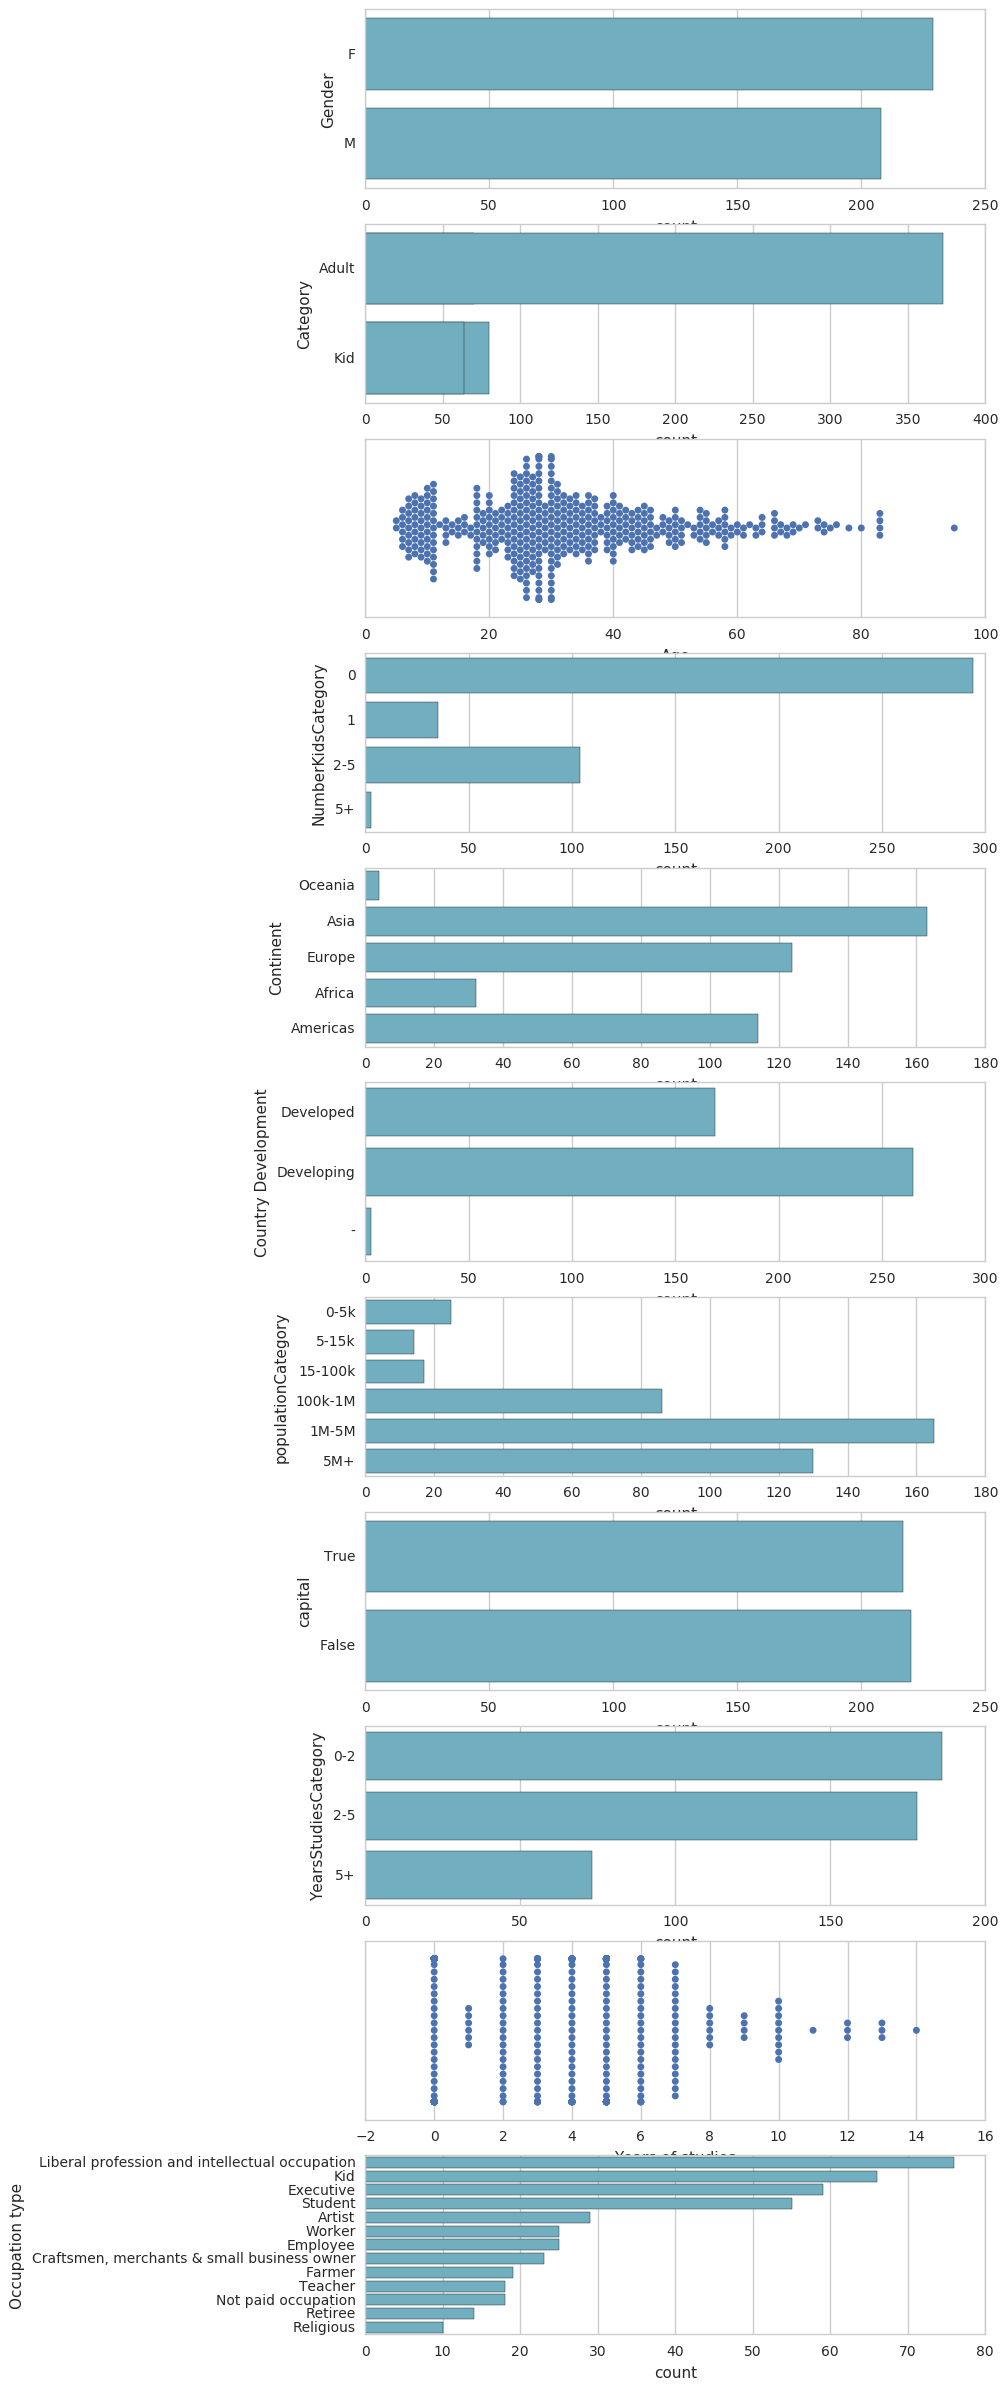

In [32]:
# Overview of people characteristics

fig, axarr = plt.subplots(11, 1, figsize=(8, 30))

sns.countplot(y="Gender", data=df_people, color="c", ax=axarr[0]);

sns.countplot(y="AgeCategory", data=df_people, color="c", ax=axarr[1]);
sns.countplot(y="Category", data=df_people, color="c", ax=axarr[1]);
sns.swarmplot(x=df_people["Age"], ax=axarr[2]);

sns.countplot(y="NumberKidsCategory", data=df_people, color="c", ax=axarr[3]);

sns.countplot(y="Continent", data=df_people, color="c", ax=axarr[4]);
sns.countplot(y="Country Development", data=df_people, color="c", ax=axarr[5]);
sns.countplot(y="populationCategory", data=df_people, color="c", ax=axarr[6]);
sns.countplot(y="capital", data=df_people, color="c", ax=axarr[7]);

sns.countplot(y="YearsStudiesCategory", data=df_people, color="c", ax=axarr[8]);
sns.swarmplot(x=df_people["Years of studies"], ax=axarr[9]);

# Repartition of occupation type
sns.countplot(
    y="Occupation type", 
    data=df_people, 
    color="c",
    order = df_people['Occupation type'].value_counts().index,
    ax=axarr[10]);
#sns.swarmplot(x=df_people["population"],ax=axarr[4]);

In [33]:
questionsList = [
    {
        'id':'32',
        'label': ' "Avez-vous la sensation que votre vie est plus simple ou plus difficile que celle de vos parents ?"'
    },
    {
        'id':'14', 
        'label': ' "Quel est ton rêve ?"'
    },
    {
        'id':'13', 
        'label': ' "De quoi avez-vous peur ? "'
    },
    {
        'id':'24', 
        'label': ' "Si vous deviez décrire notre planète à un extraterrestre, que diriez-vous ?  "'
    },
    {
        'id':'7', 
        'label': ' "De quoi avez-vous besoin ?  "'
    },
    {
        'id':'6.1', 
        'label': ' " Si vous étiez président des Etats-Unis, quelle serait votre première réforme ? / Scale  "'
    },
    {
        'id':'6.2', 
        'label': ' " Si vous étiez président des Etats-Unis, quelle serait votre première réforme ? / Topics   "'
    },
    {
        'id':'8', 
        'label': ' " Que feriez-vous si l\'on vous donnait maintenant 1M d\'euros ?  "'
    },
    {
        'id':'10', 
        'label': ' " Quelle innovation, réaliste ou non, faciliterait grandement votre quotidien ?  "'
    },
    {
        'id':'15.1', 
        'label': ' " Fermez les yeux, vous êtes en 2100, que voyez-vous ? / Perception  "'
    },
    {
        'id':'15.2', 
        'label': ' " Fermez les yeux, vous êtes en 2100, que voyez-vous ? / Topics  "'
    },
    {
        'id':'16', 
        'label': ' " Quelle est la plus belle chose que vous ayez vu dans votre vie ?   "'
    },
    {
        'id':'19', 
        'label': ' " Quelle est la spécificité culturelle de votre pays dont vous être le plus fier?  "'
    }
]

In [53]:
# - PART 2 STATS REGARDING 32 ANSWERS
# -------------------------------------------- #
from IPython.display import display, HTML
from ipywidgets import widgets

def getDfQuestion(df_original,questionIndex, questionName):
    df_question = df_original[df_original[questionIndex] != '']
    #print("People answering the question : " + questionName)
    #print("-> " + str(round(len(df_question)/len(df_original)*100,1)) + "% of total interviewed people (" + str(len(df_question)) + " people) \n")
    return df_question

def getCatOrdered(df_question,questionIndex):
    valuesCount = df_question[questionIndex].value_counts()
    indexSorted = valuesCount.index.values.tolist()
    return indexSorted

def computeValuePercentage(df_question,questionIndex):
    valuesCount = df_question[questionIndex].value_counts()
    valuesCount_df = pd.DataFrame(valuesCount)
    valuesCount_df['%'] = round(valuesCount_df[questionIndex] / len(df_question) * 100,1)
    return valuesCount_df


# Crosstab to compute absolute and relative % of answers compared to a characteristic
def dataHeatmap(data,question,characteristic,cols_ordered):
    cross = pd.crosstab(index=data[characteristic], columns=data[question], normalize='index', margins=True, dropna=False)
    cross = cross[cols_ordered]
    return cross

def dataAbsolute(data,question,characteristic,cols_ordered):
    cross = pd.crosstab(index=data[characteristic], columns=data[question], margins=True, dropna=False)
    cross = cross[cols_ordered]
    return cross
    
def displayTable(val, val_abs):
    display(val.style\
        .set_properties(**{'font-size': '9pt'})\
        .format("{:.1%}"))

    display(val_abs.style.set_properties(**{'font-size': '9pt'}))
    

#draw stacked bar. Input is a DF of a question (no empty) and Attribute to détails to (ex : Age Category)
#def stackedBarPlot(data, attributeName, attributeList, questionID, questionCategories, colorTab):
#change : no attribute list parameter, compute it from the data
def stackedBarPlot(data, attributeName, questionID, questionCategories, colorTab):
    
    val = dataHeatmap(data, questionID, attributeName, questionCategories)
    val_abs = dataAbsolute(data, questionID, attributeName, questionCategories)
    attributeList = val.index.tolist()
    #print(val.index.tolist())

    list = []
    r = []
    for i in range(len(attributeList)):
        r.append(i)

    for cat in questionCategories:
        list.append(val[cat].tolist())

    #print("attributeList : " + str(attributeList))
    #print(list)
    #print("len of list[0] : " + str(len(list[0])))
    #print("len of r : " + str(len(r)))
    #print(val_abs)

    # plot
    barWidth = 0.5
    plt.figure(figsize=(6,3))  
    
    #chart

    plt.bar(r, list[0], bottom=None, color=colorTab[0], edgecolor='white', width=barWidth, label=questionCategories[0], align='center')
    plt.bar(r, list[1], bottom=list[0], color=colorTab[1], edgecolor='white', width=barWidth, label=questionCategories[1] ,align='center')
    plt.bar(r, list[2], bottom=[a+b for a,b in zip(list[0], list[1])], color=colorTab[2], edgecolor='white', width=barWidth, label=questionCategories[2] ,align='center')
    if len(list) > 3:
        plt.bar(r, list[3], bottom=[a+b+c for a,b,c in zip(list[0], list[1], list[2])], color=colorTab[3], edgecolor='white', width=barWidth, label=questionCategories[3] ,align='center')
    if len(list) > 4:
        plt.bar(r, list[4], bottom=[a+b+c+d for a,b,c,d in zip(list[0], list[1], list[2], list[3])], color=colorTab[4], edgecolor='white', width=barWidth, label=questionCategories[4] ,align='center')
    if len(list) > 5:
        plt.bar(r, list[5], bottom=[a+b+c+d+e for a,b,c,d,e in zip(list[0], list[1], list[2], list[3], list[4])], color=colorTab[5], edgecolor='white', width=barWidth, label=questionCategories[5] ,align='center')
    if len(list) > 6:
        plt.bar(r, list[6], bottom=[a+b+c+d+e+f for a,b,c,d,e,f in zip(list[0], list[1], list[2], list[3], list[4], list[5])], color=colorTab[6], edgecolor='white', width=barWidth, label=questionCategories[6] ,align='center')
    if len(list) > 7:
        plt.bar(r, list[7], bottom=[a+b+c+d+e+f+g for a,b,c,d,e,f,g in zip(list[0], list[1], list[2], list[3], list[4], list[5], list[6])], color=colorTab[7], edgecolor='white', width=barWidth, label=questionCategories[7] ,align='center')
    if len(list) > 8:
        plt.bar(r, list[8], bottom=[a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h in zip(list[0], list[1], list[2], list[3], list[4], list[5], list[6], list[7])], color=colorTab[8], edgecolor='white', width=barWidth, label=questionCategories[8] ,align='center')
    if len(list) > 9:
        plt.bar(r, list[9], bottom=[a+b+c+d+e+f+g+h+i for a,b,c,d,e,f,g,h,i in zip(list[0], list[1], list[2], list[3], list[4], list[5], list[6], list[7], list[8])], color=colorTab[9], edgecolor='white', width=barWidth, label=questionCategories[9] ,align='center')
    if len(list) > 10:
        plt.bar(r, list[10], bottom=[a+b+c+d+e+f+g+h+i+j for a,b,c,d,e,f,g,h,i,j in zip(list[0], list[1], list[2], list[3], list[4], list[5], list[6], list[7], list[8], list[9])], color=colorTab[10], edgecolor='white', width=barWidth, label=questionCategories[10] ,align='center')

    # Custom x axis
    plt.xticks(r, attributeList, rotation='vertical')
    #plt.xticks(rotation=30)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    # Show graphic
    plt.show()
    
    #Display data tables
    displayTable(val,val_abs)
        
def displayQuestionStat(df_original,questionIndex, questionName):
    df_question = getDfQuestion(df_original,questionIndex, questionName)
    
    print("People answering the question : " + questionName)
    print("-> " + str(round(len(df_question)/len(df_original)*100,1)) + "% of total interviewed people (" + str(len(df_question)) + " people)")
    indexSorted = getCatOrdered(df_question,questionIndex)
    valueCount_df = computeValuePercentage(df_question,questionIndex)
    display(valueCount_df.style.bar(subset=['%'], color='lightgrey'))
    
    stackedBarPlot(df_question, "Gender", questionIndex, indexSorted, colorTab)
    stackedBarPlot(df_question, "AgeCategory", questionIndex, indexSorted, colorTab)
    stackedBarPlot(df_question, "populationCategory", questionIndex, indexSorted, colorTab)
    stackedBarPlot(df_question, "capital", questionIndex, indexSorted, colorTab)
    stackedBarPlot(df_question, "Occupation type", questionIndex, indexSorted, colorTab)
    stackedBarPlot(df_question, "YearsStudiesCategory", questionIndex, indexSorted, colorTab)
   
    print("----------------------------- \n ")

People answering the question :  "Avez-vous la sensation que votre vie est plus simple ou plus difficile que celle de vos parents ?"
-> 32.7% of total interviewed people (143 people)


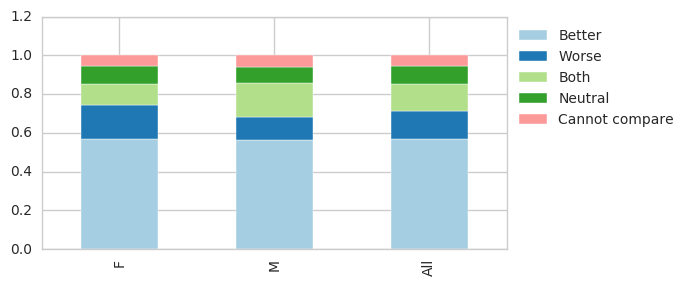

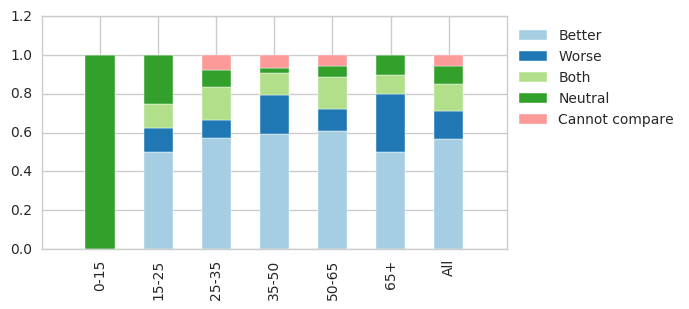

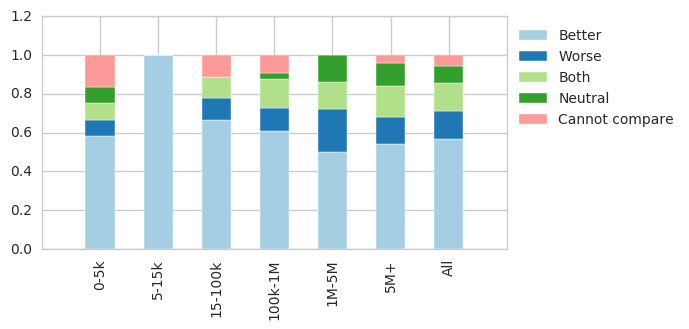

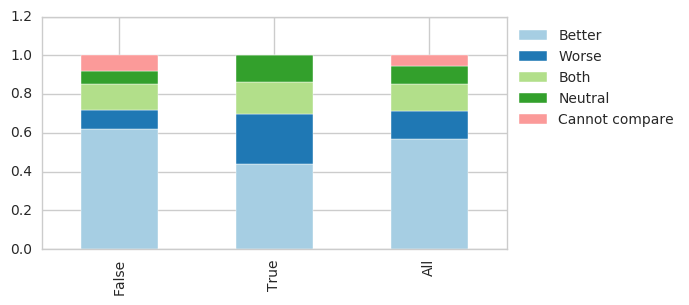

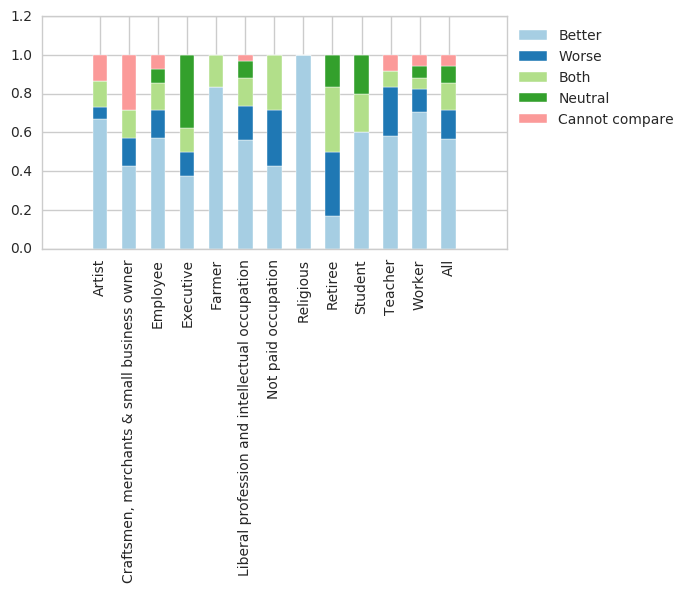

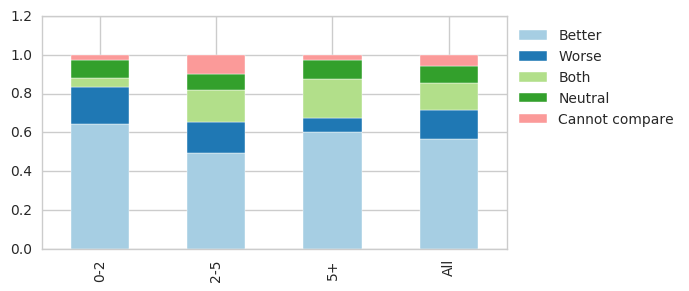

----------------------------- 
 
People answering the question :  "Quel est ton rêve ?"
-> 48.5% of total interviewed people (212 people)


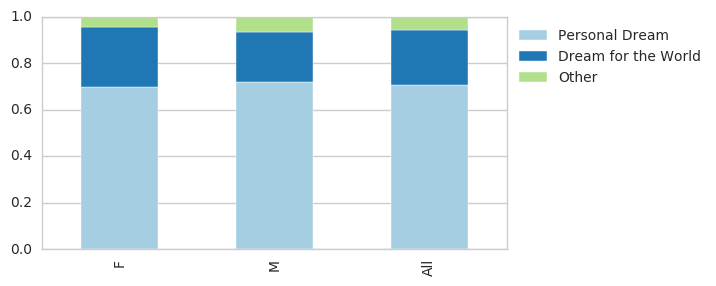

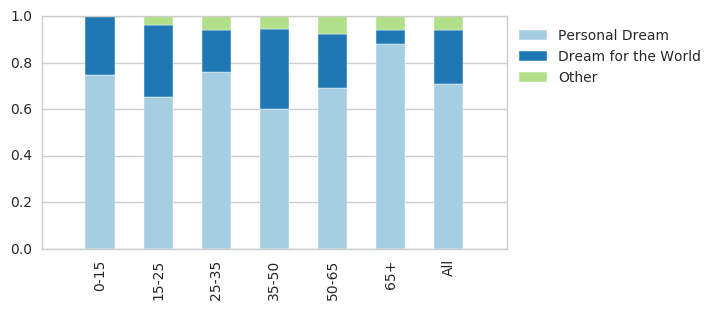

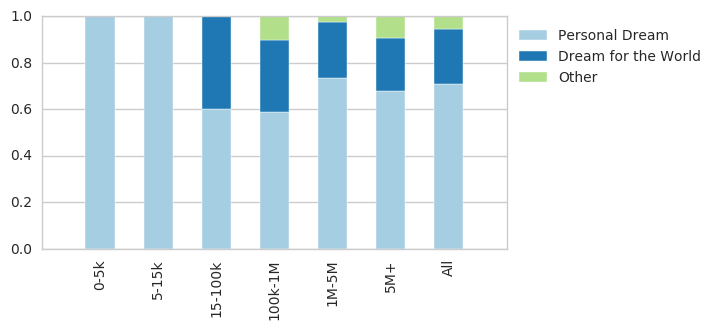

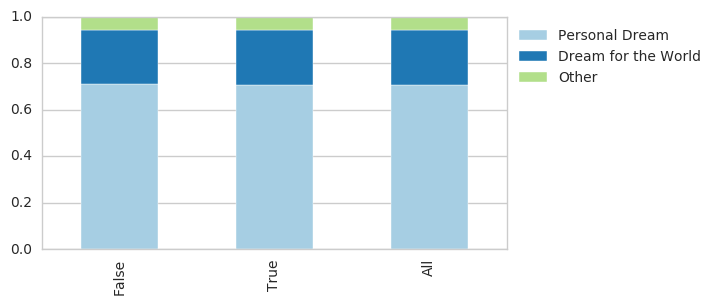

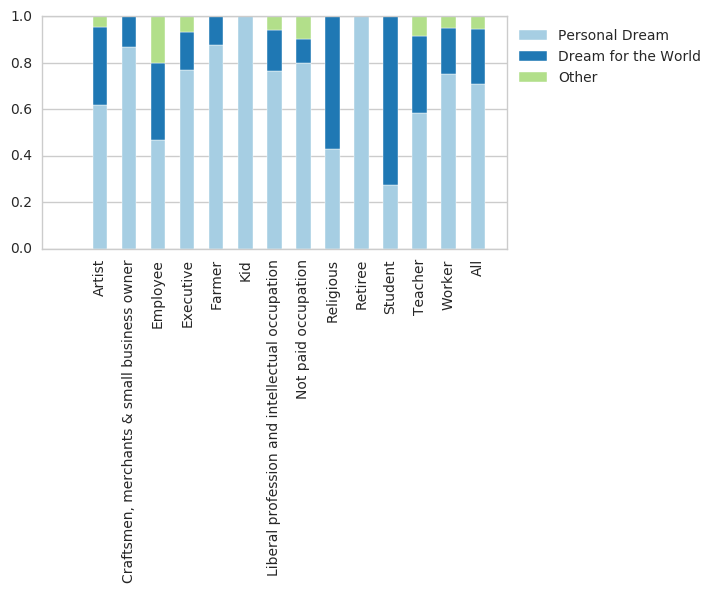

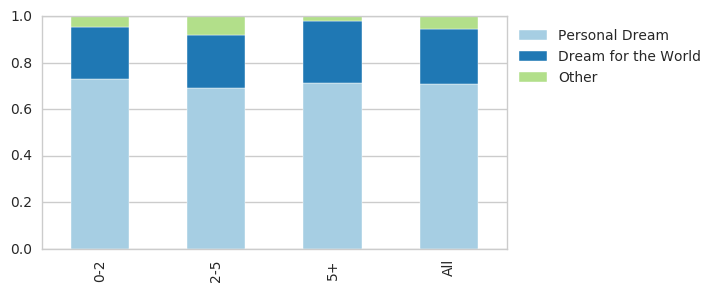

----------------------------- 
 
People answering the question :  "De quoi avez-vous peur ? "
-> 52.9% of total interviewed people (231 people)


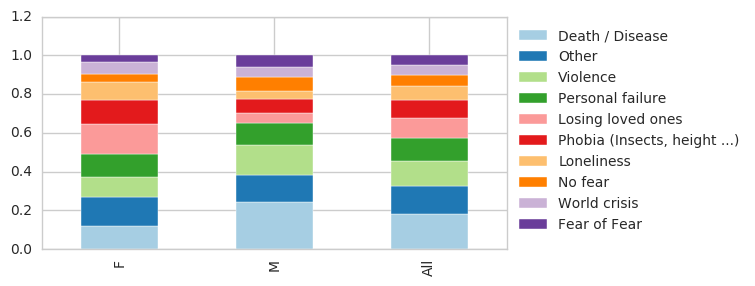

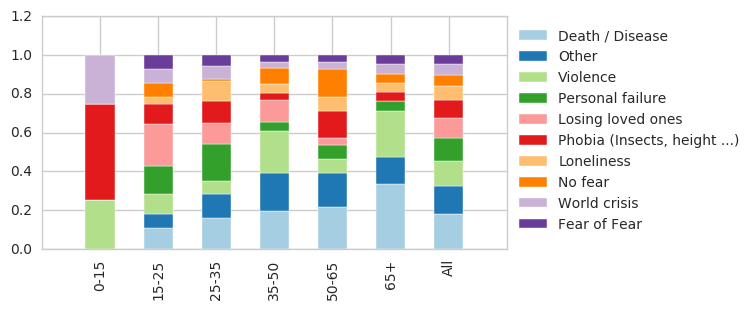

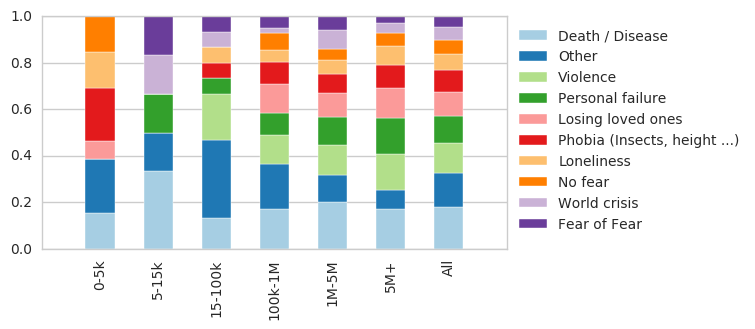

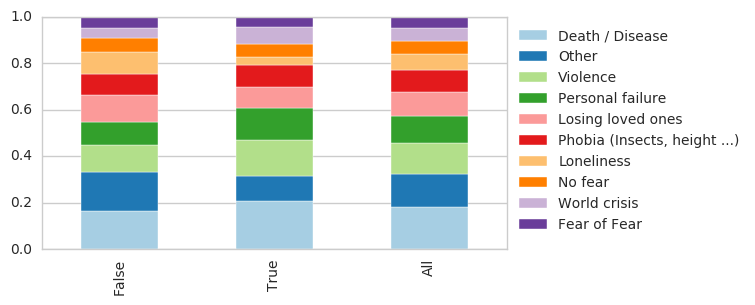

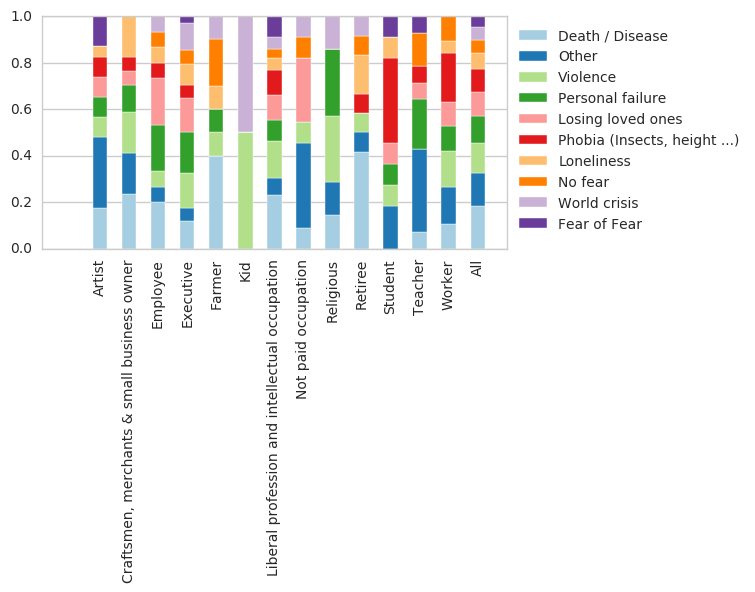

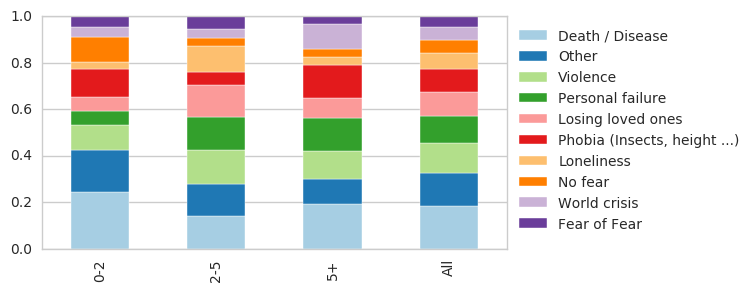

----------------------------- 
 
People answering the question :  "Si vous deviez décrire notre planète à un extraterrestre, que diriez-vous ?  "
-> 50.1% of total interviewed people (219 people)


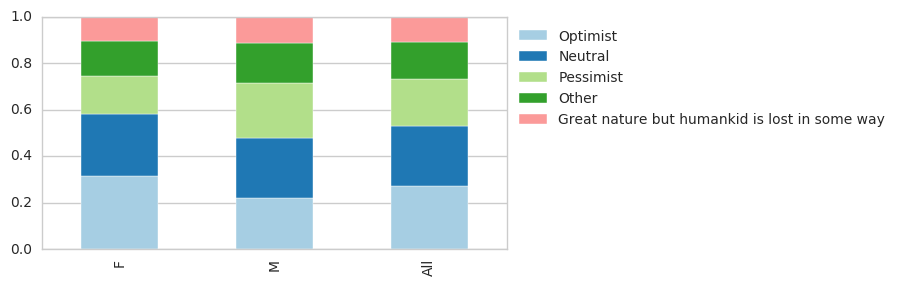

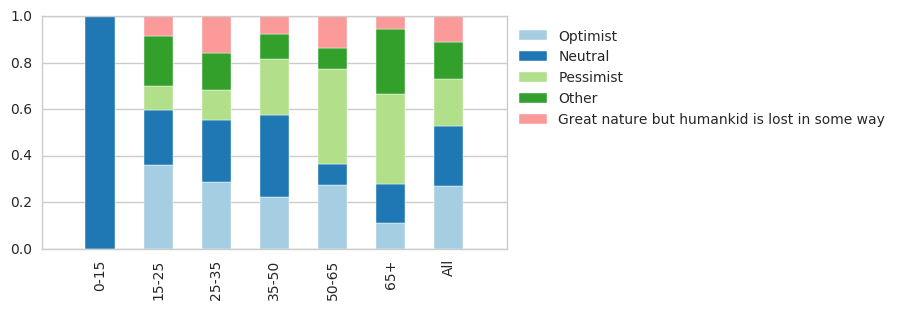

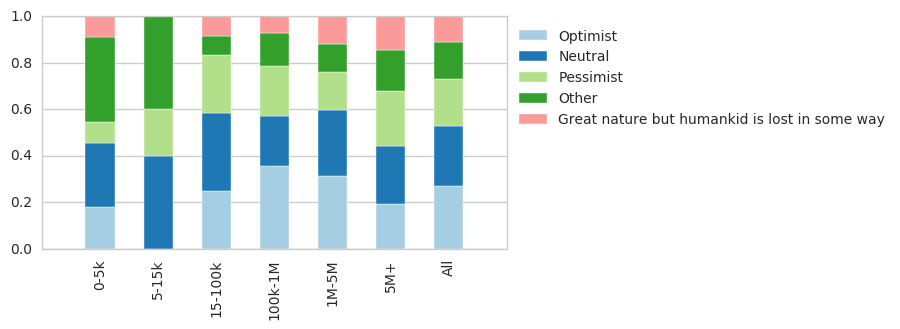

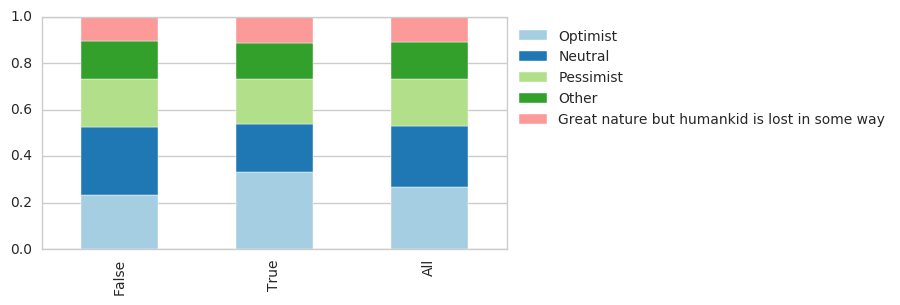

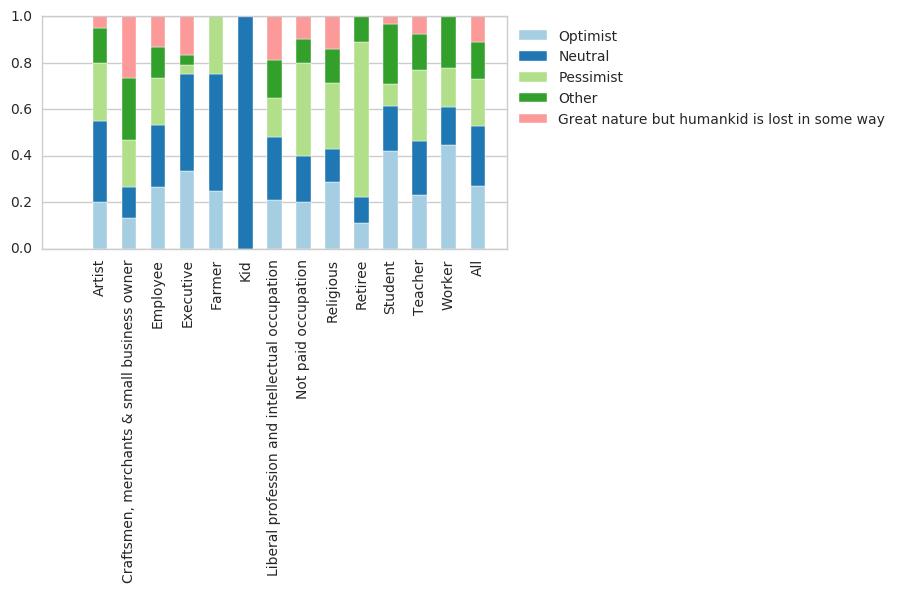

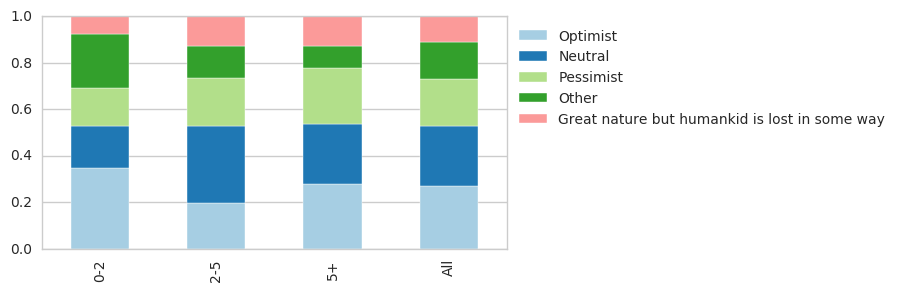

----------------------------- 
 
People answering the question :  "De quoi avez-vous besoin ?  "
-> 51.5% of total interviewed people (225 people)


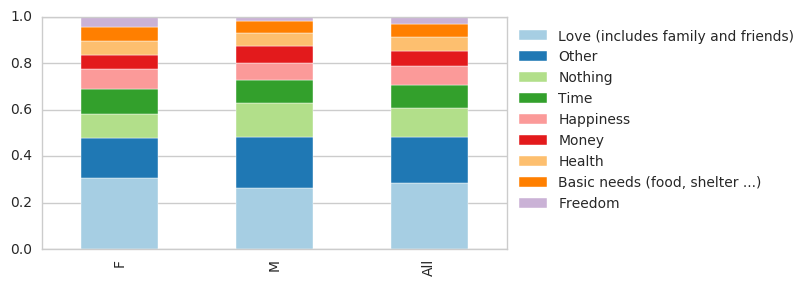

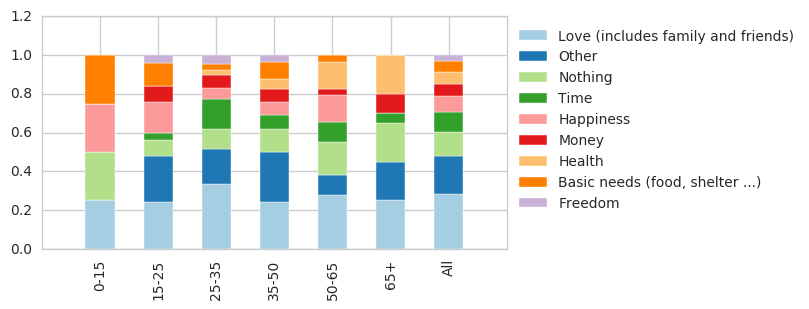

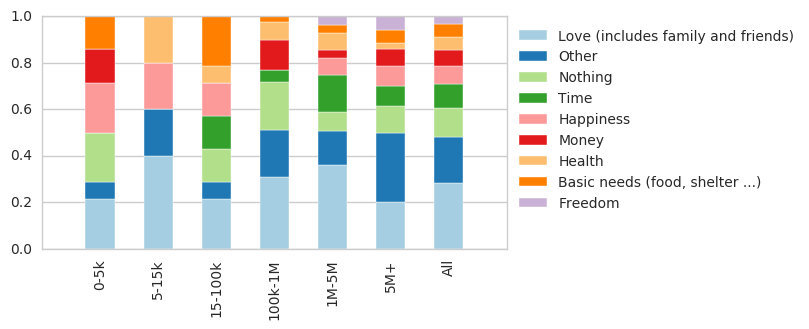

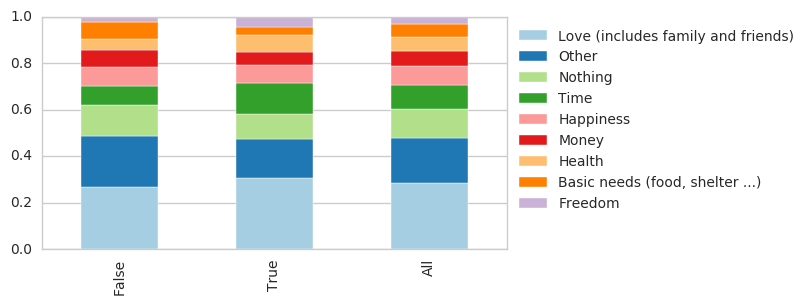

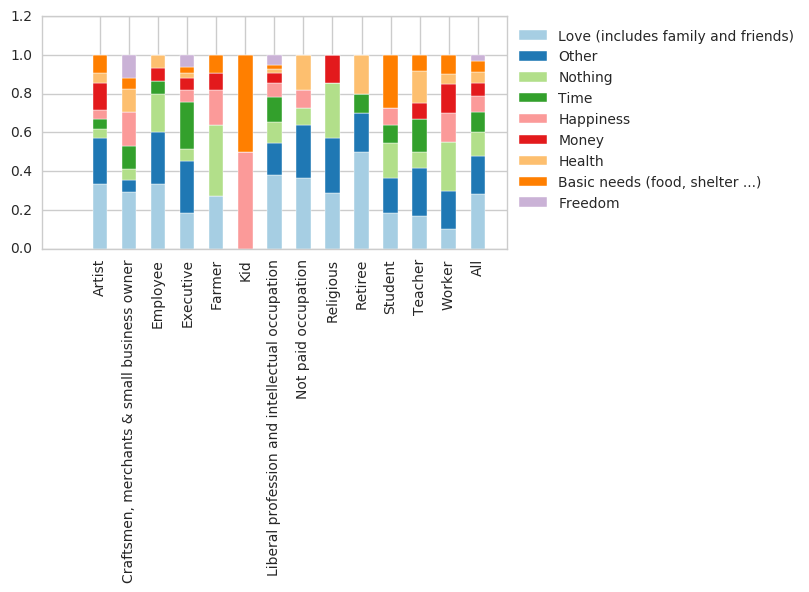

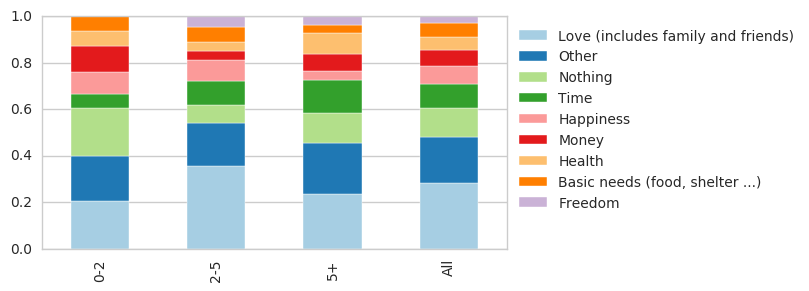

----------------------------- 
 
People answering the question :  " Si vous étiez président des Etats-Unis, quelle serait votre première réforme ? / Scale  "
-> 51.0% of total interviewed people (223 people)


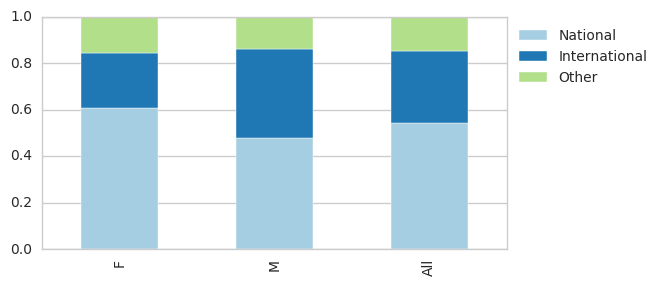

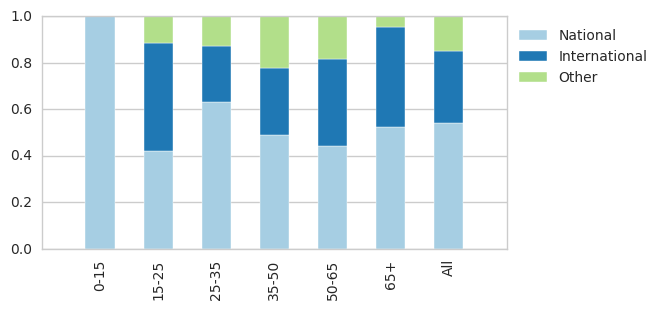

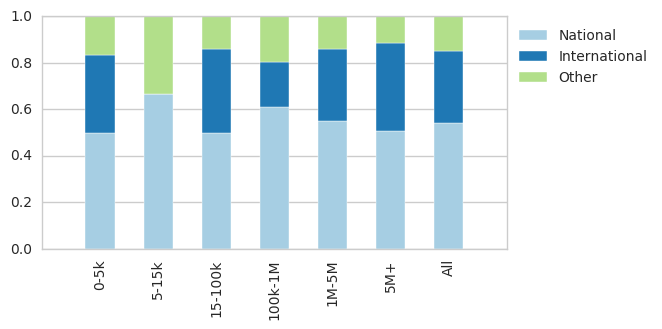

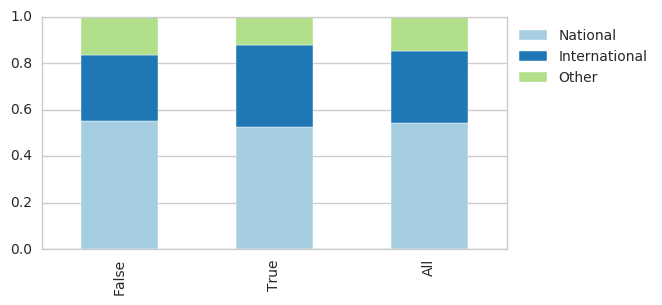

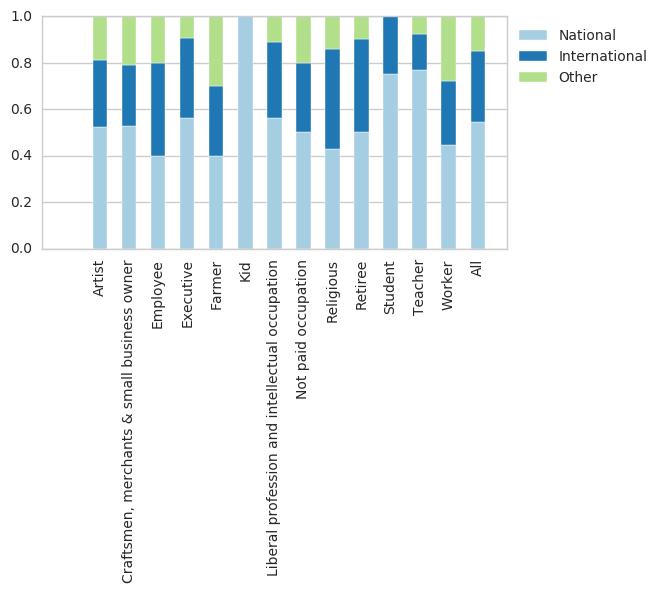

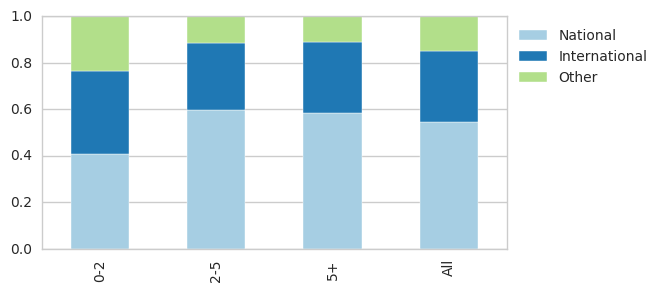

----------------------------- 
 
People answering the question :  " Si vous étiez président des Etats-Unis, quelle serait votre première réforme ? / Topics   "
-> 51.0% of total interviewed people (223 people)


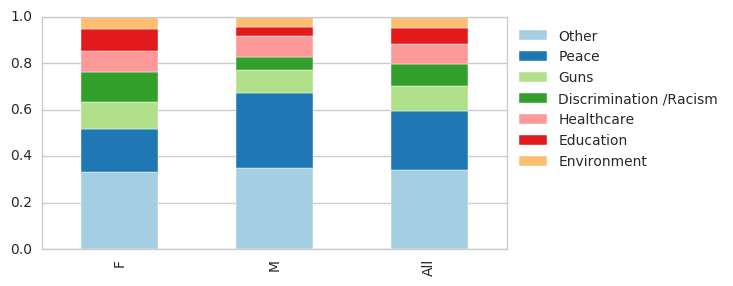

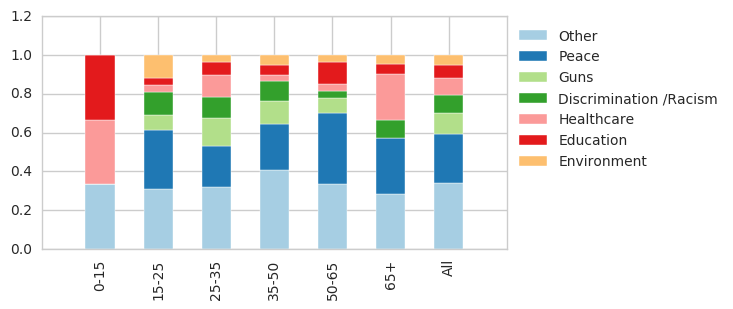

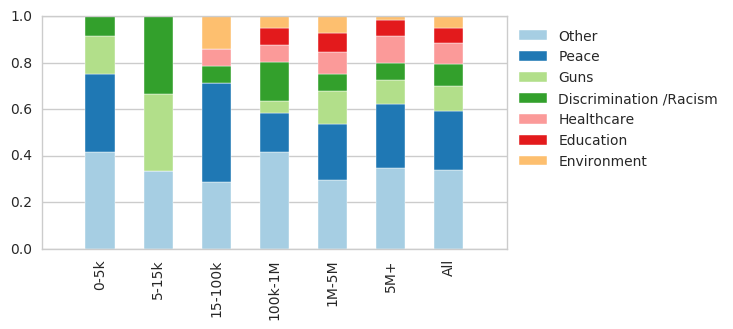

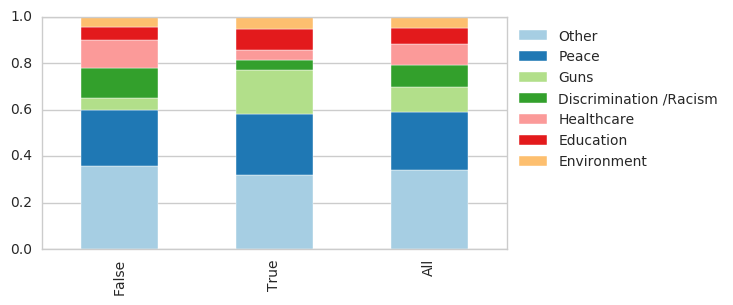

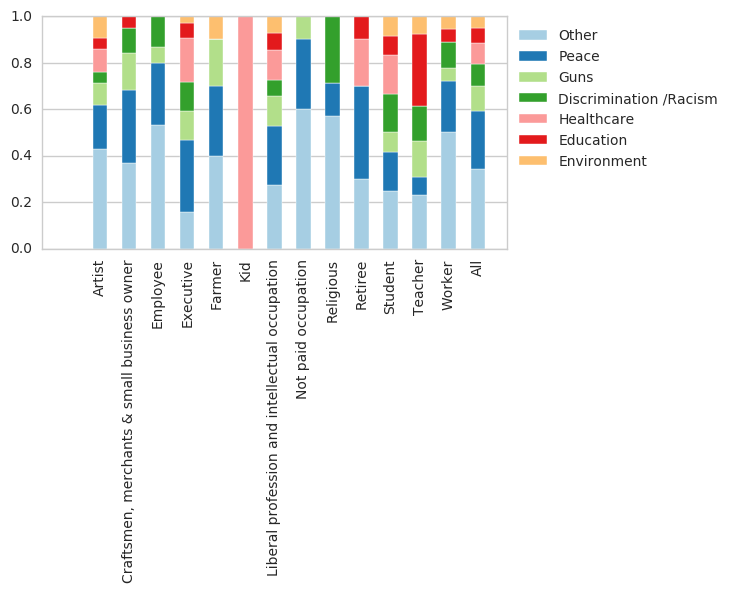

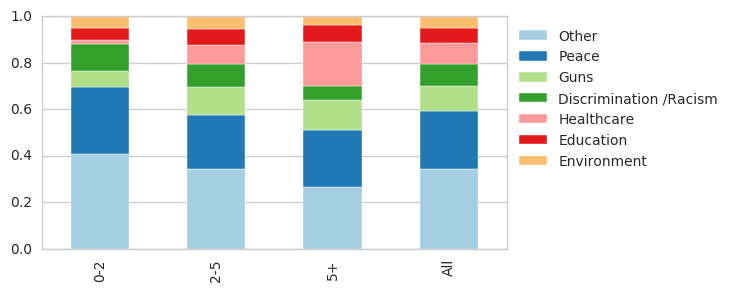

----------------------------- 
 
People answering the question :  " Que feriez-vous si l'on vous donnait maintenant 1M d'euros ?  "
-> 52.9% of total interviewed people (231 people)


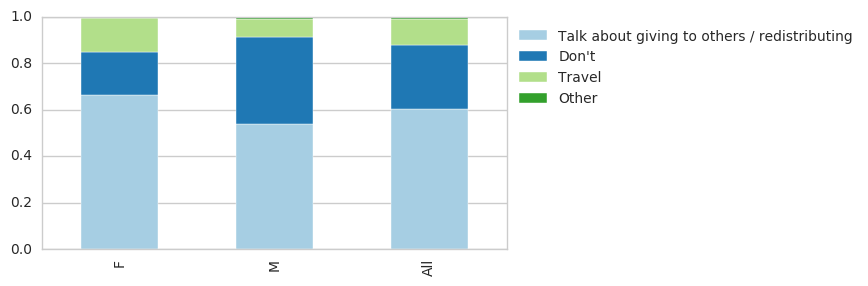

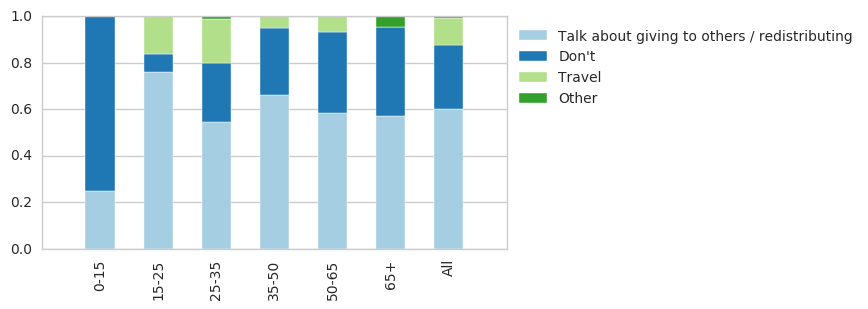

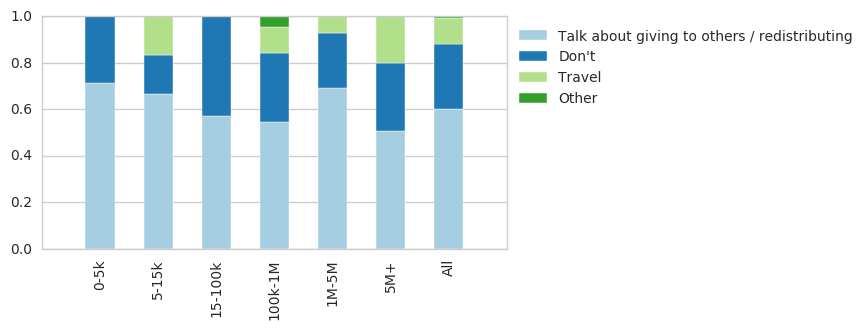

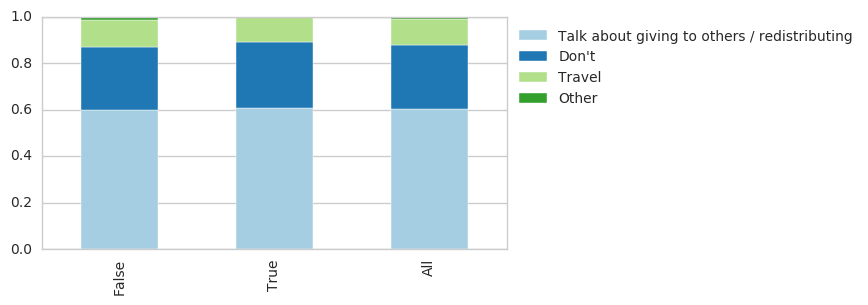

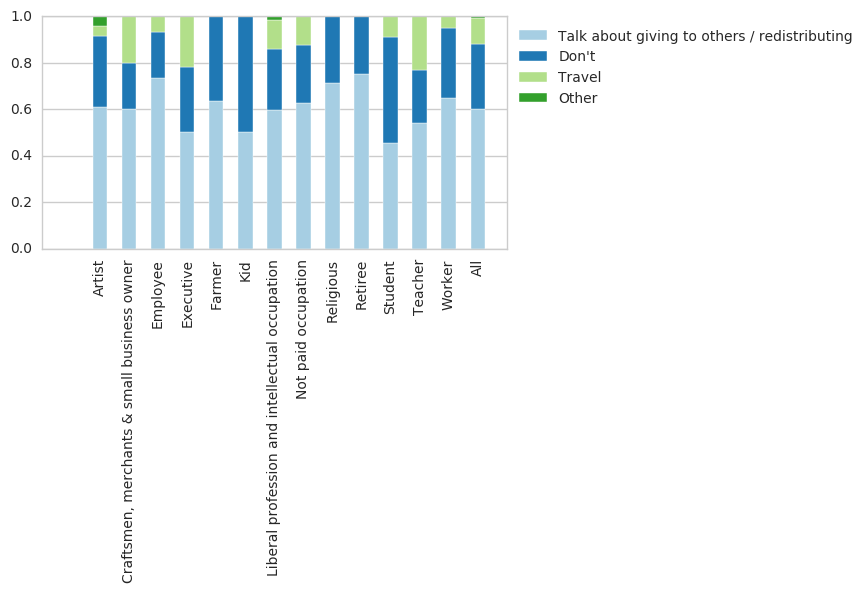

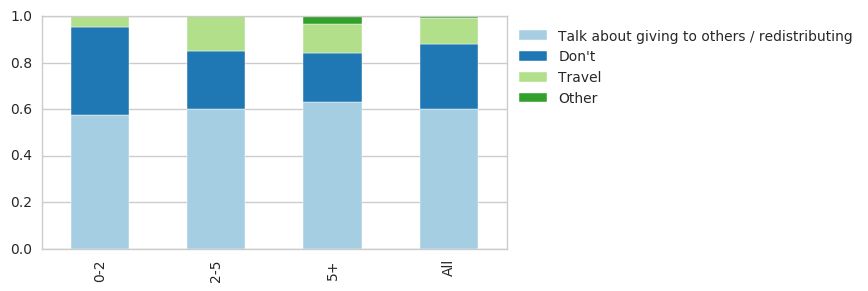

----------------------------- 
 
People answering the question :  " Quelle innovation, réaliste ou non, faciliterait grandement votre quotidien ?  "
-> 47.4% of total interviewed people (207 people)


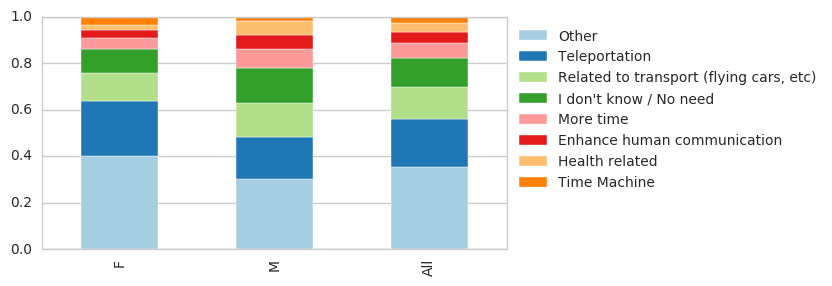

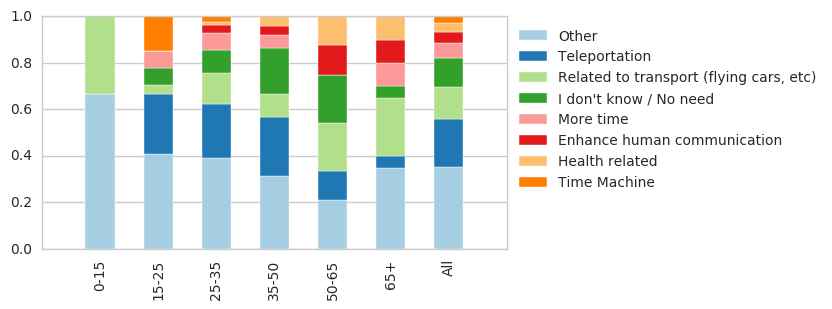

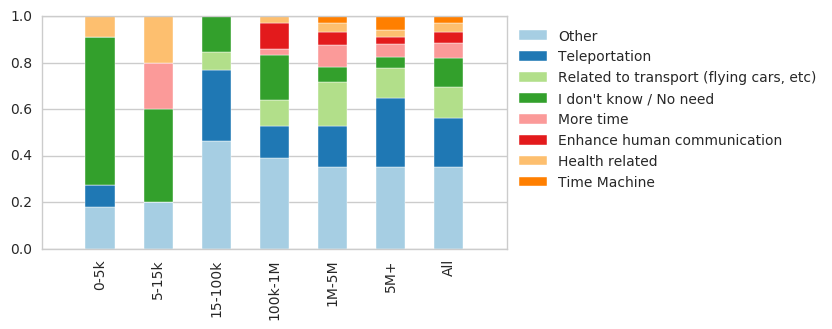

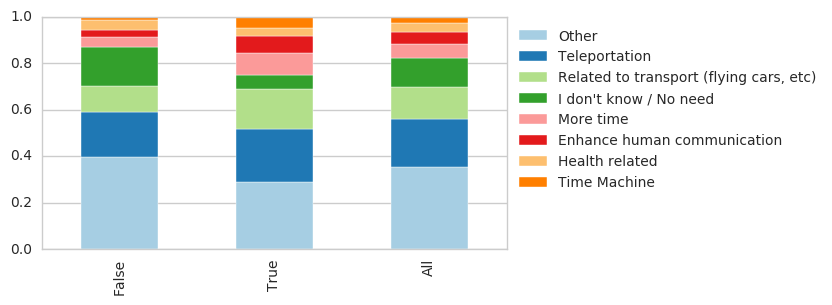

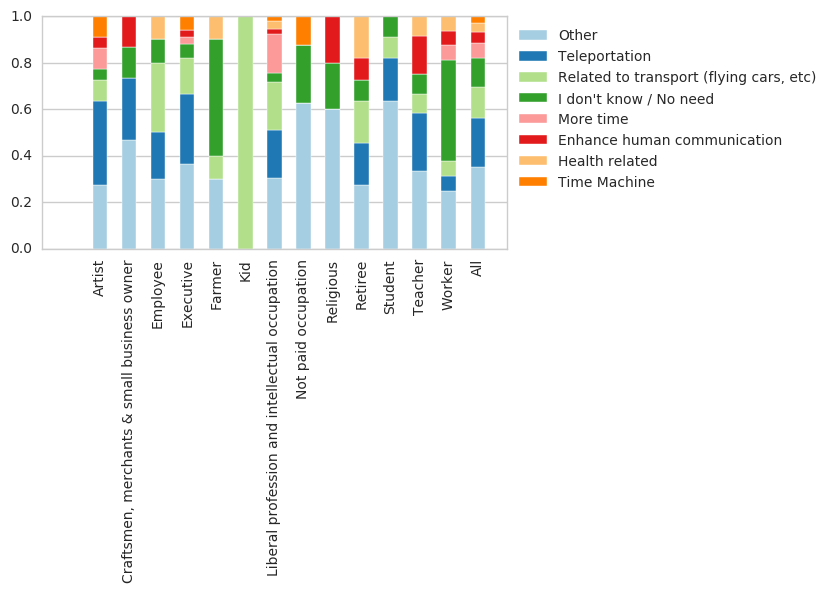

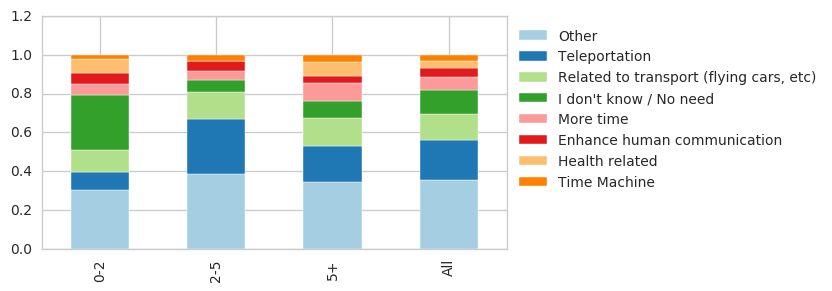

----------------------------- 
 
People answering the question :  " Fermez les yeux, vous êtes en 2100, que voyez-vous ? / Perception  "
-> 57.9% of total interviewed people (253 people)


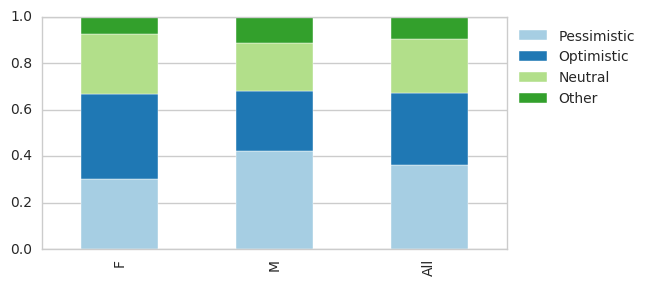

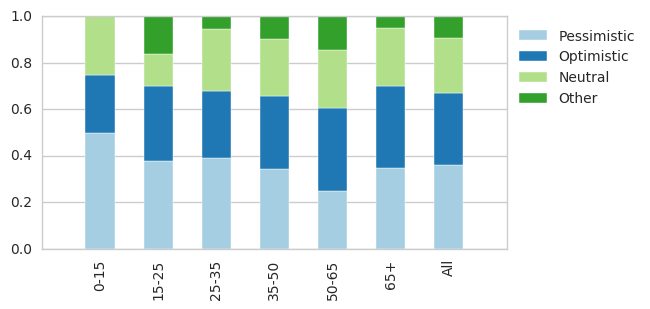

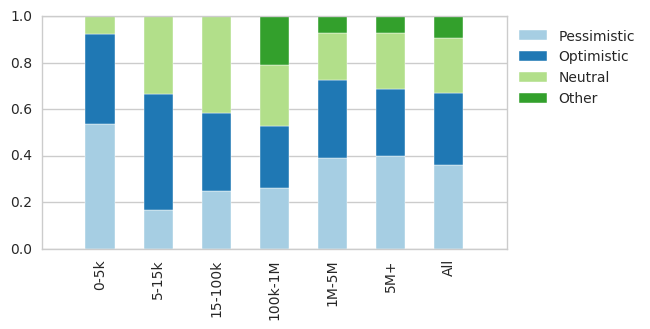

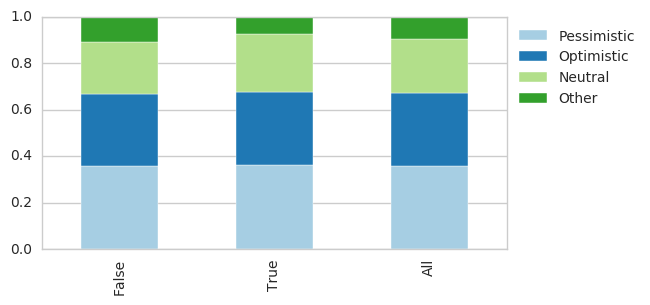

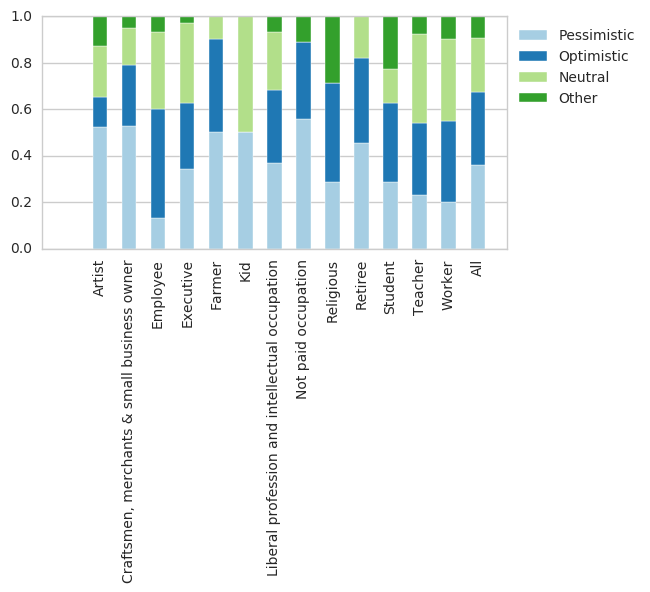

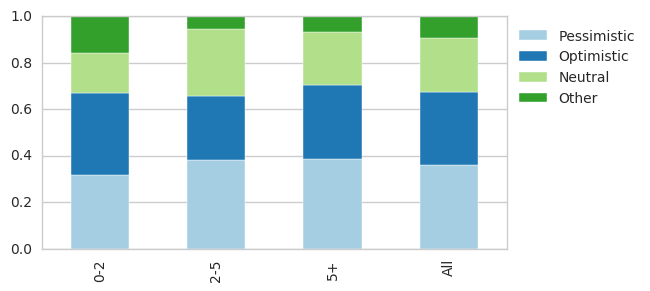

----------------------------- 
 
People answering the question :  " Fermez les yeux, vous êtes en 2100, que voyez-vous ? / Topics  "
-> 57.9% of total interviewed people (253 people)


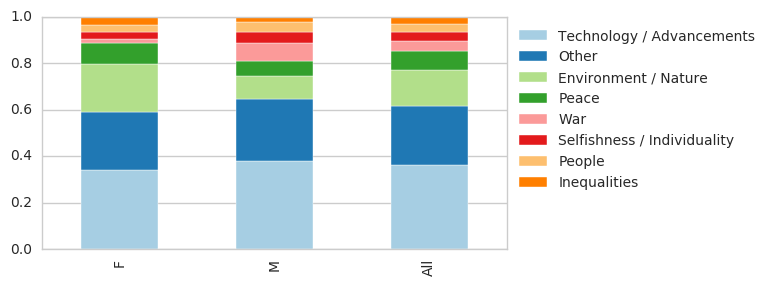

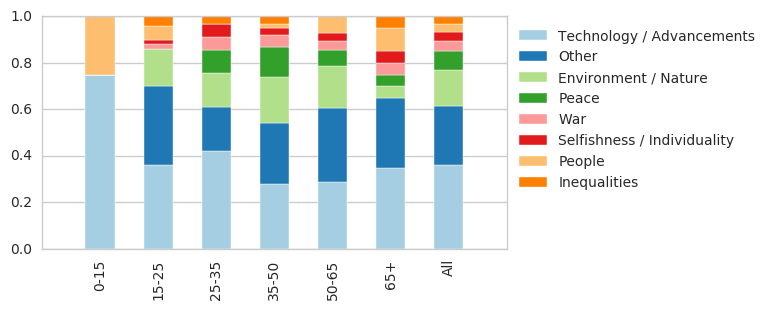

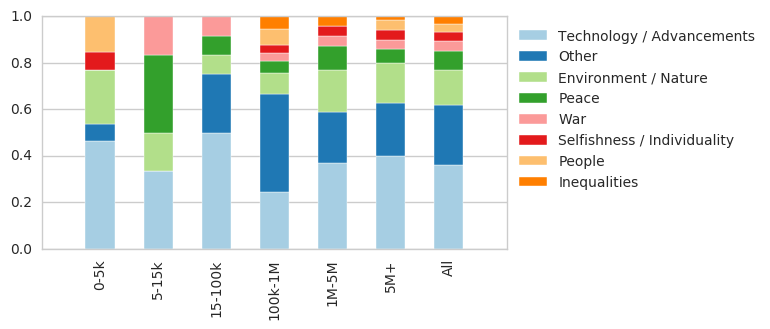

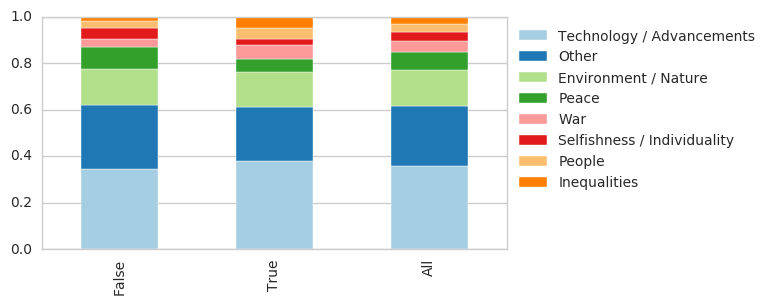

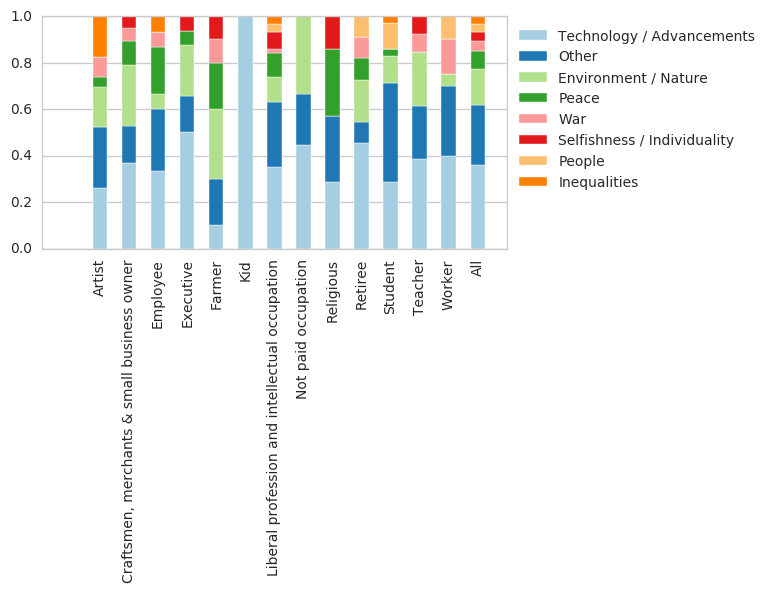

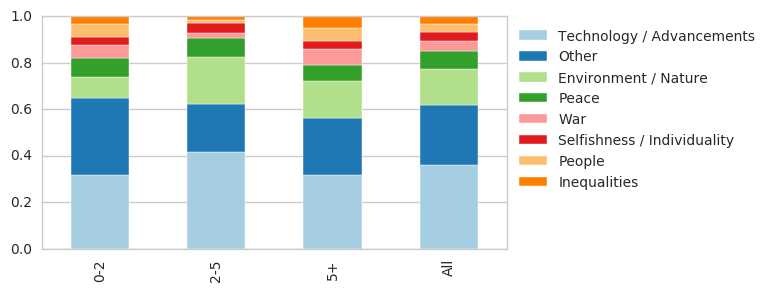

----------------------------- 
 
People answering the question :  " Quelle est la plus belle chose que vous ayez vu dans votre vie ?   "
-> 41.4% of total interviewed people (181 people)


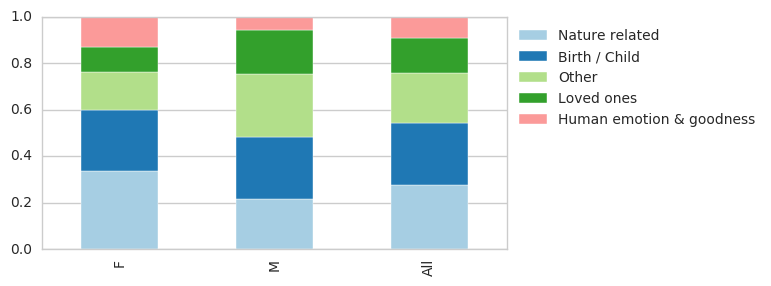

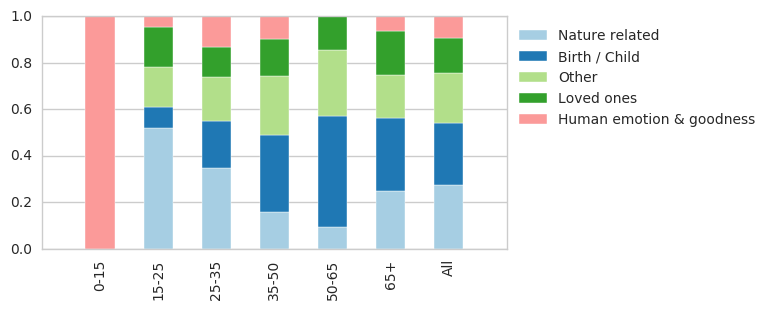

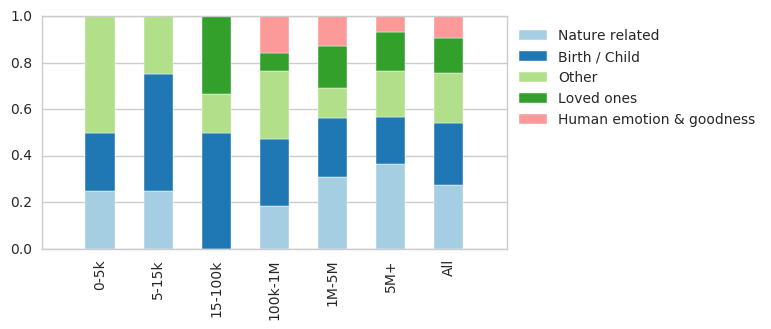

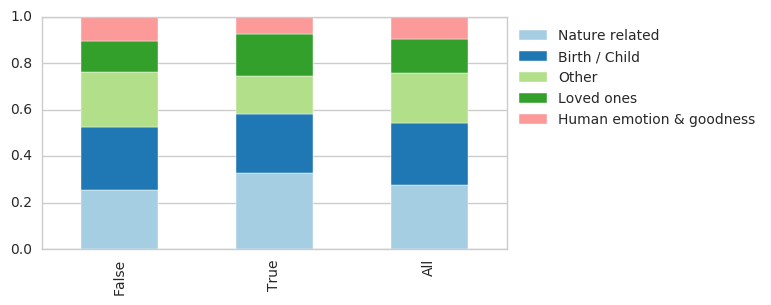

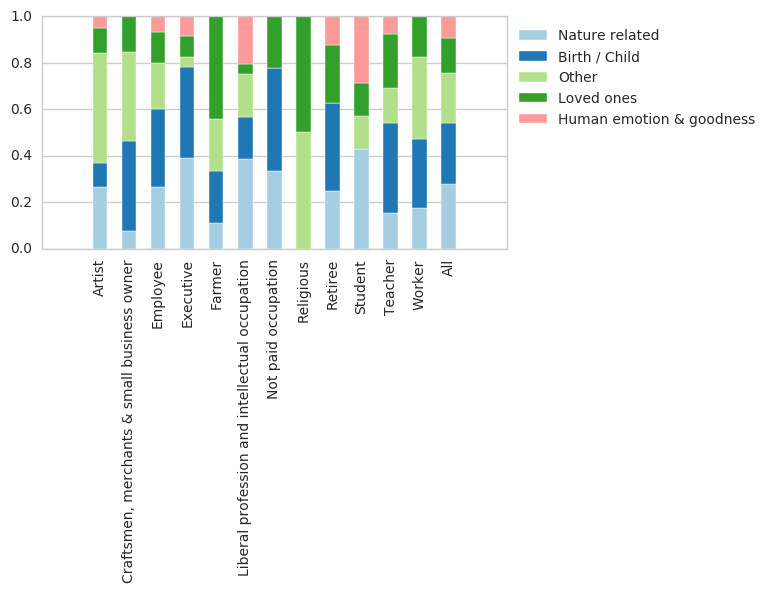

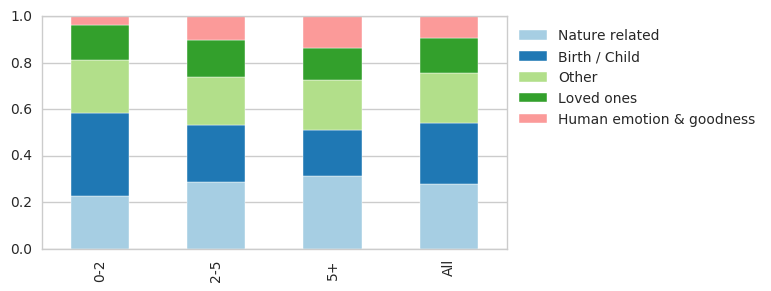

----------------------------- 
 
People answering the question :  " Quelle est la spécificité culturelle de votre pays dont vous être le plus fier?  "
-> 49.0% of total interviewed people (214 people)


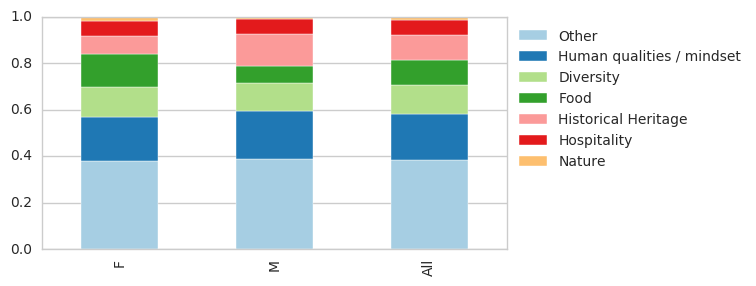

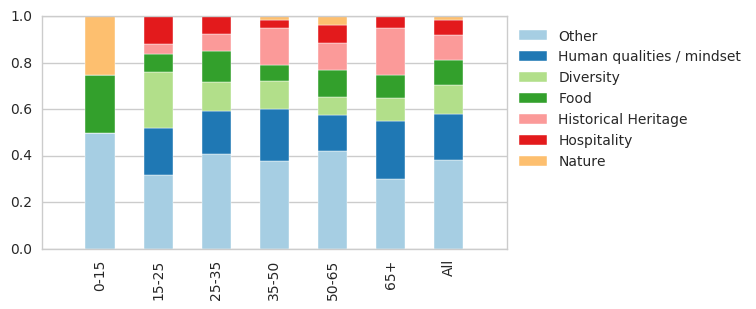

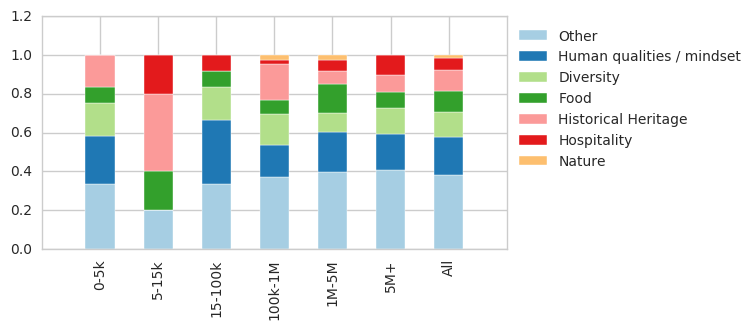

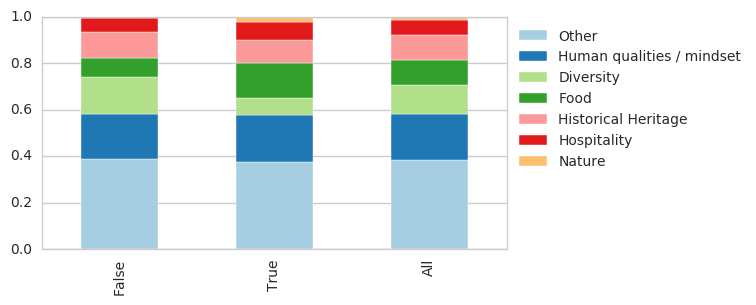

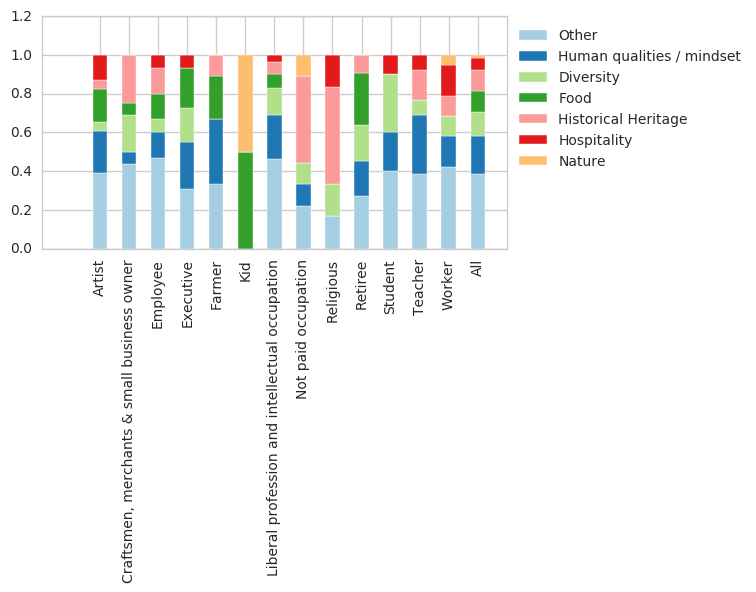

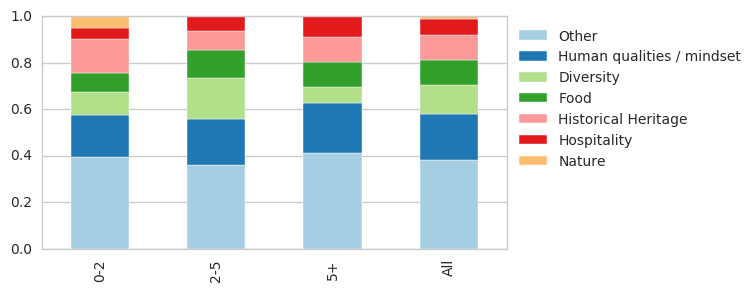

----------------------------- 
 


In [54]:
# Display all infos for each questions

#colorTab = sns.color_palette("Set2")
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']
colorTab = sns.color_palette(colors)

for i in range(len(questionsList)):
    question_id = questionsList[i]['id']
    question_label = questionsList[i]['label']
    df_question = getDfQuestion(df_people, question_id, question_label)
    displayQuestionStat(df_people, question_id, question_label)

Number of people who answered at question 32 and 7 : 140


7               Basic needs (food, shelter ...)  Freedom  Happiness  Health  \
32                                                                            
Better                                        4        2          6       6   
Both                                          0        0          1       1   
Cannot compare                                3        0          0       0   
Neutral                                       0        1          1       0   
Worse                                         2        1          0       4   

7               Love (includes family and friends)  Money  Nothing  Other  \
32                                                                          
Better                                          18      7       14     16   
Both                                             8      1        1      5   
Cannot compare                                   0      2        2      1   
Neutral                                          5      1        1      2   
Worse                                            5      2        1      5   

7               Time  
32                    
Better             6  
Both               3  
Cannot compare     0  
Neutral            2  
Worse              0

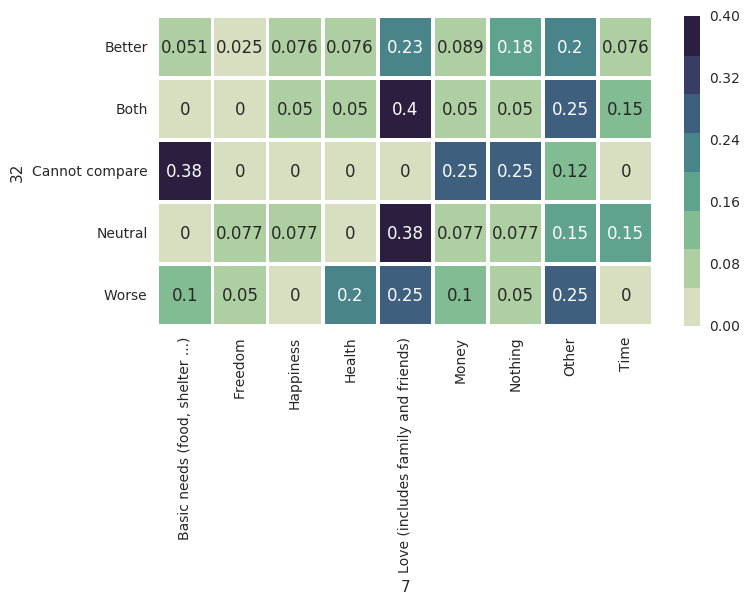

In [44]:
#test for comparaison btw 2 answers
questionIndex1 = '32'
questionIndex2 = '7'

data = df_people[(df_people[questionIndex1] != '') & (df_people[questionIndex2] != '')]
print("Number of people who answered at question " + questionIndex1 + " and " + questionIndex2 + " : " + str(len(data)))

cross = pd.crosstab(index=data[questionIndex1], columns=data[questionIndex2], dropna=False)
cross_perc = pd.crosstab(index=data[questionIndex1], columns=data[questionIndex2], normalize='index', dropna=False)
display(cross)

plt.figure(figsize=(8,4))
sns.heatmap(cross_perc, linewidths=2, linecolor='white', annot=True, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))


In [33]:
# function draw heatmap


def drawHeatmapSimpleAx(data,fig_size_x,fig_size_y, annot, ax, axID):
    annotHeatmap = False
    if(annot == True):
        annotHeatmap = True
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(data, ax=ax[axID], linewidths=2, linecolor='white', annot=annotHeatmap, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))

def drawHeatmapSimple(data,fig_size_x,fig_size_y, annot):
    annotHeatmap = False
    if(annot == True):
        annotHeatmap = True
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(data, linewidths=2, linecolor='white', annot=annotHeatmap, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))
    
def drawHeatmap(data,question,characteristic,cols_ordered,fig_size_x,fig_size_y):
    #cross = pd.crosstab(index=data[characteristic], columns=df_32[question], normalize='index', margins=True)
    #cross = cross[cols_ordered]
    cross = dataHeatmap(data,question,characteristic,cols_ordered)
    #scale = len(cols_ordered) / (len(data[characteristic].unique())+1)
    #print(len(cols_ordered))
    #print(len(data[characteristic].unique())+1)
    #print("scale :  " + str(scale))
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(cross, linewidths=2, linecolor='white', cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))
    
def viewSmallCategorical(data, question, categorical, cols_ordered):
    #fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
    fig, axarr = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw = {'width_ratios':[5, 3]})
    
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[0])
    sns.heatmap(dataHeatmap(data,question,categorical,cols_ordered), linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr[1])
    
def dualViewQuantitative(data, question, quanti, categorical, cols_ordered):
    fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
    
    sns.heatmap(dataHeatmap(data,question,categorical,cols_ordered), linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr[0])
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[1])
    
    sns.violinplot(x=quanti, y=question, data=data, bw=.2, ax=axarr[2])
    sns.swarmplot(x=quanti, y=question, color="k", size=3, data=data, ax=axarr[2])
    


def viewSmallCategorical2(data, question, categorical, cols_ordered, colorTab):
    #fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
    fig, axarr = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw = {'width_ratios':[5, 3]})
    
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[0])
    
    #stackedBarPlot(data, "populationCategory", populationCategory, '14', cols_ordered, colorTab)
    
def allGraphs(data, question, cols_ordered):
    #gender = ['F', 'M']
    #viewSmallCategorical2(data,question, "Gender", cols_ordered, cols_ordered,cols_ordered)
    dualViewQuantitative(data,question, "Age", "AgeCategory", cols_ordered)
    dualViewQuantitative(data,question, "Number of kids", "NumberKidsCategory", cols_ordered)
    dualViewQuantitative(data,question, "Years of studies", "YearsStudiesCategory", cols_ordered)
    viewSmallCategorical(data,question, "Country Development", cols_ordered);
    viewSmallCategorical(data,question, "populationCategory", cols_ordered);
    drawHeatmap(data,question,'Occupation type',cols_ordered, 3.2, 6)


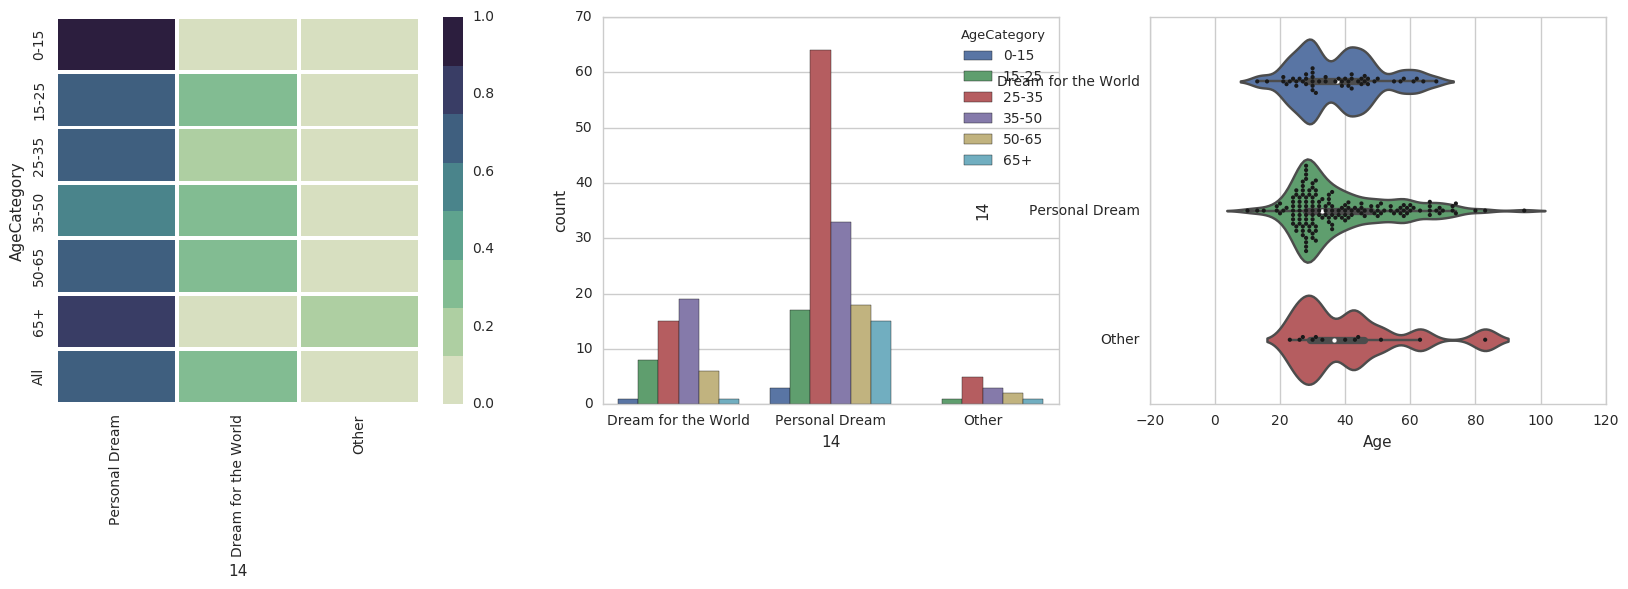

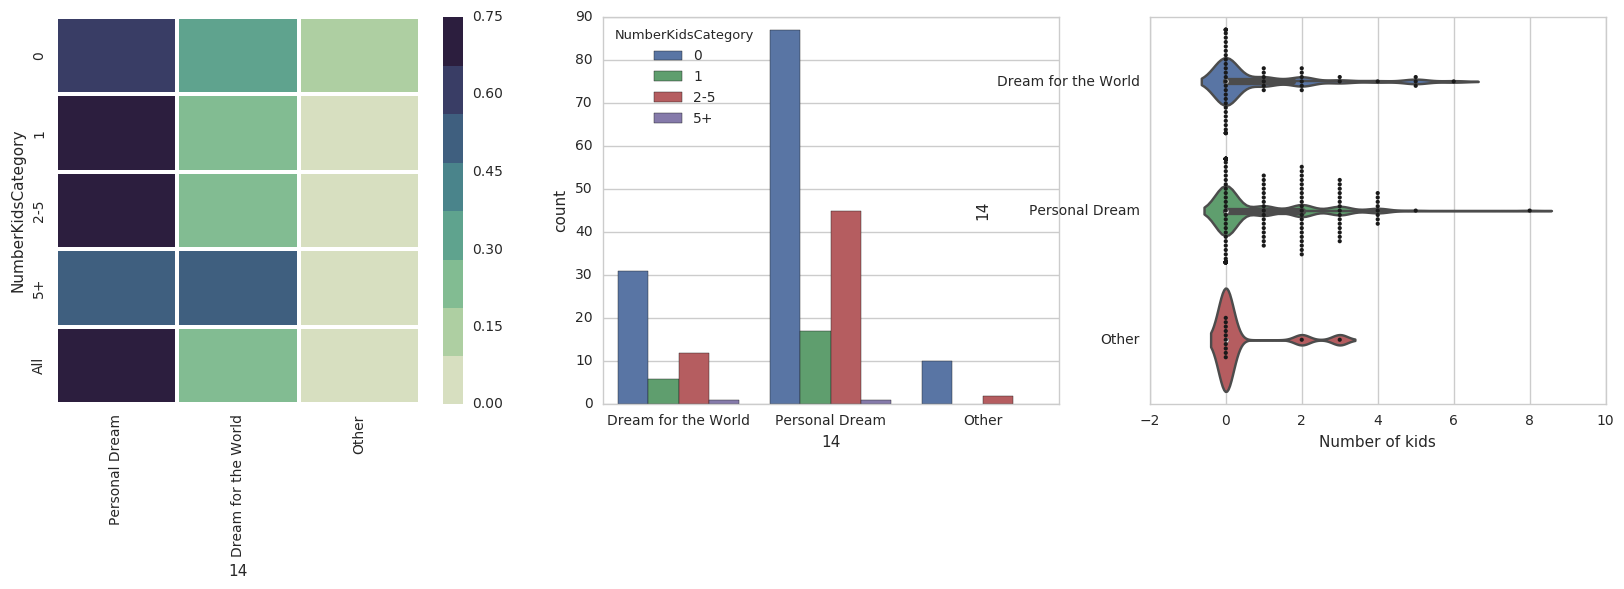

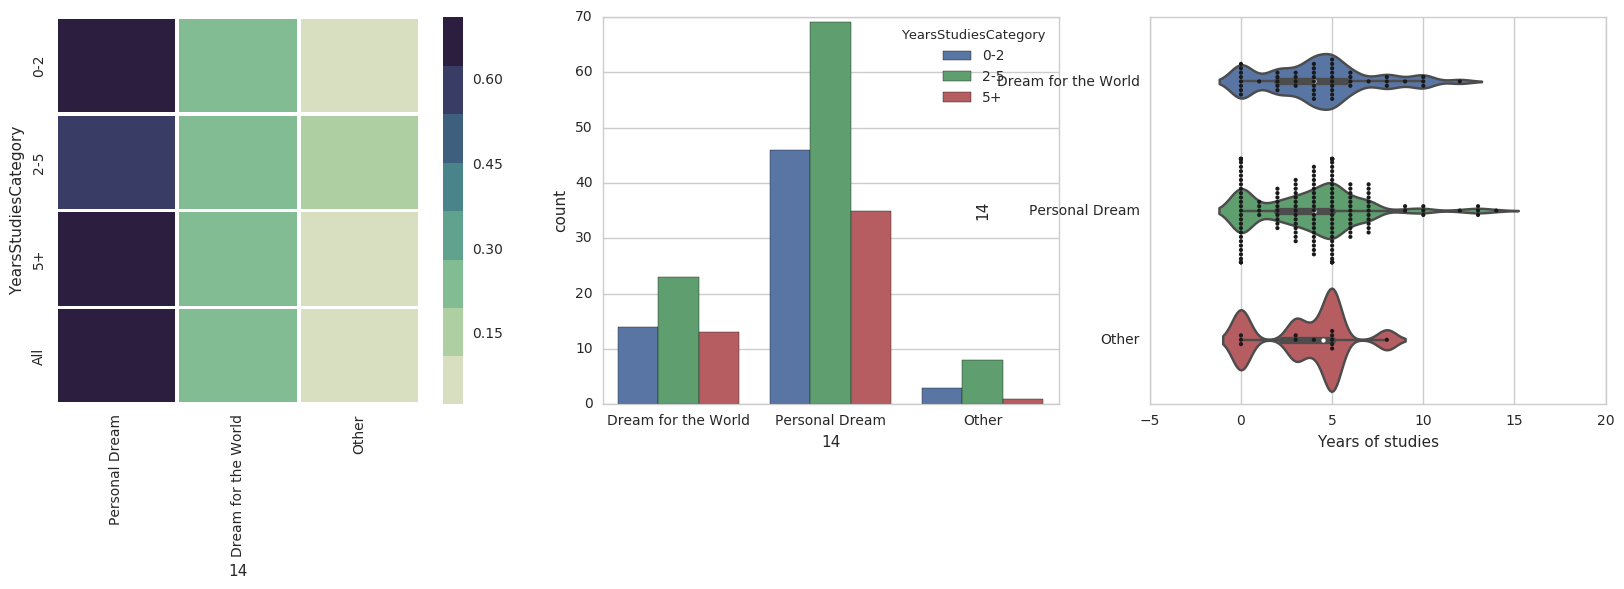

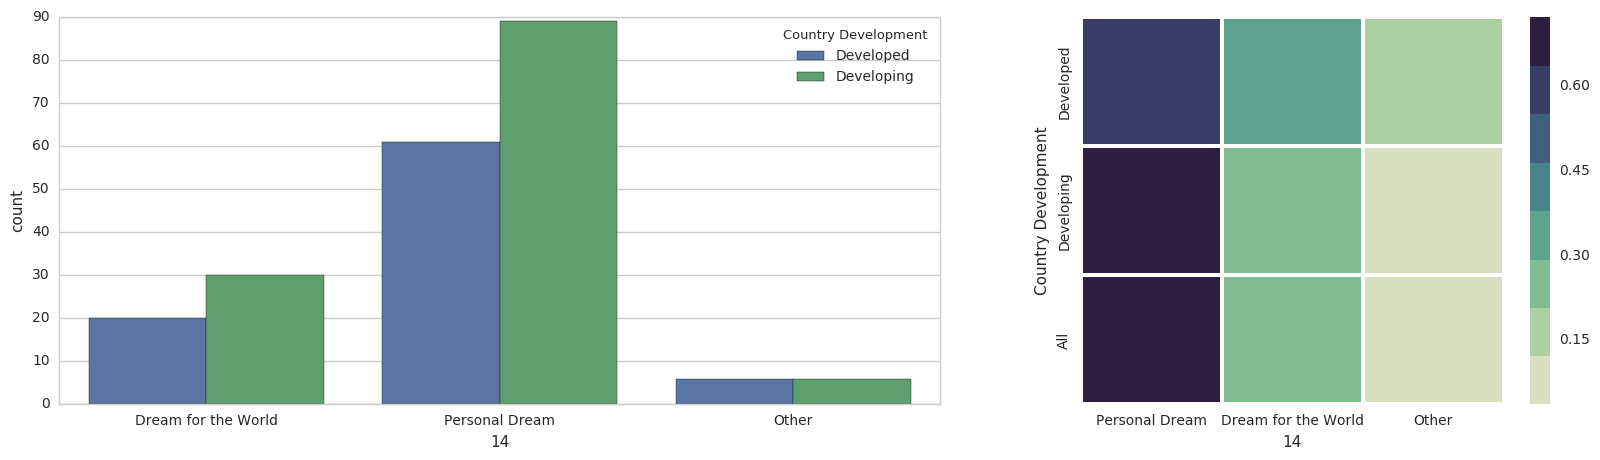

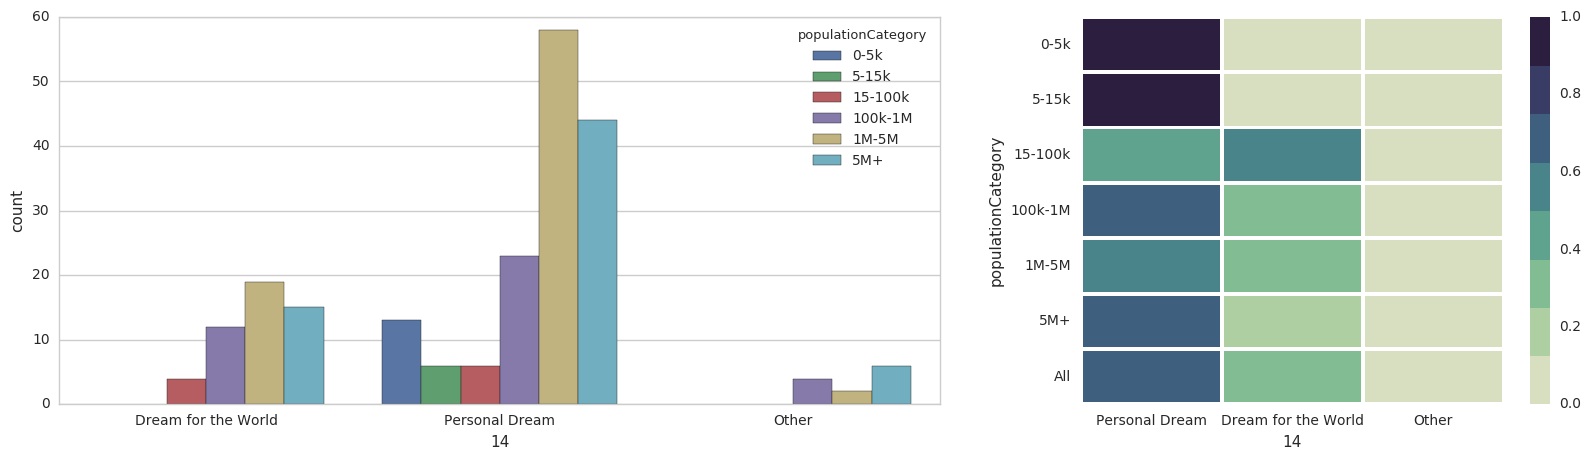

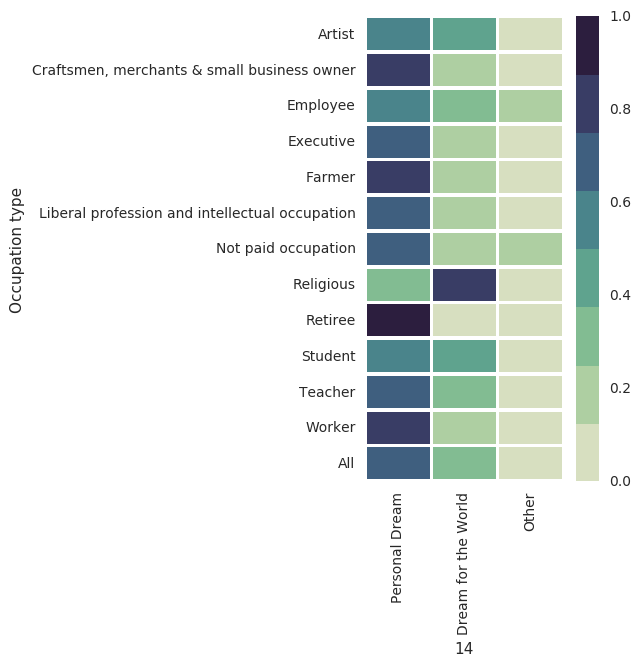

In [135]:
allGraphs(df_14, '14', categories_14)

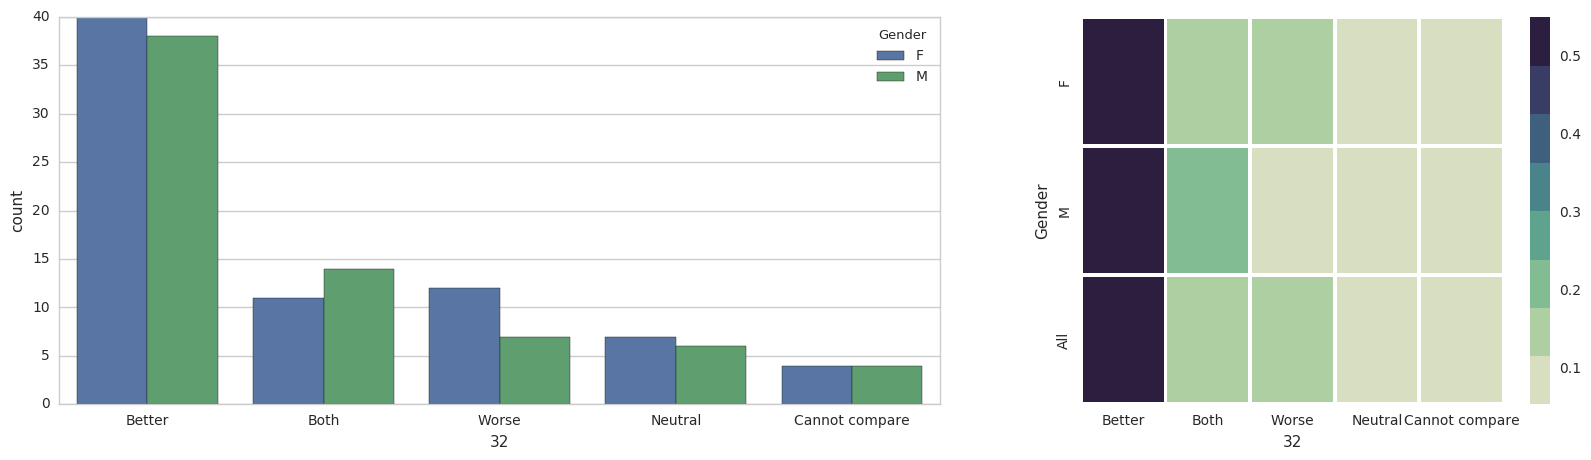

In [30]:
viewSmallCategorical(df_32,"32", "Gender", categories_32);

#sns.countplot(y="32", hue="Gender", data=df_32)
#drawHeatmap(df_32,'32','Gender',cols_ordered, 4, 2)
#pd.crosstab(index=df_32.Gender, columns=df_32['32'], normalize='index', margins=True)
#pd.crosstab(index=df_32['32'], columns=df_32.Gender, normalize='index', margins=True)

In [31]:
dualViewQuantitative(df_32,"32", "Age", "AgeCategory");
dualViewQuantitative(df_32,"32", "Number of kids", "NumberKidsCategory");
dualViewQuantitative(df_32,"32", "Years of studies", "YearsStudiesCategory");

TypeError: dualViewQuantitative() missing 1 required positional argument: 'cols_ordered'

In [32]:
#sns.countplot(y="32", hue="Country Development", data=df_32)
viewSmallCategorical(df_32,"32", "Country Development", cols_ordered);
viewSmallCategorical(df_32,"32", "populationCategory", cols_ordered);

NameError: name 'cols_ordered' is not defined

In [33]:
#fig_2, axarr_2 = plt.subplots(1, 2, figsize=(10, 4))

#sns.heatmap(cross_continent_perc, linewidths=2, linecolor='white', 
#            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
#            ax=axarr_2[0])

#sns.heatmap(cross_continent_perc_2, linewidths=2, linecolor='white', 
#            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
#            ax=axarr_2[1])

In [34]:
drawHeatmap(df_32,'32','Occupation type',cols_ordered, 3.2, 6)

NameError: name 'cols_ordered' is not defined

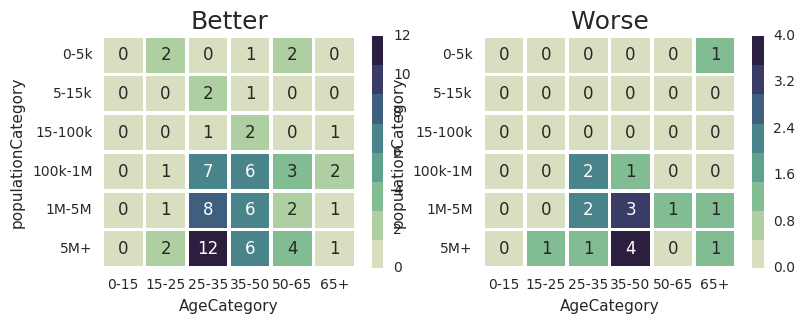

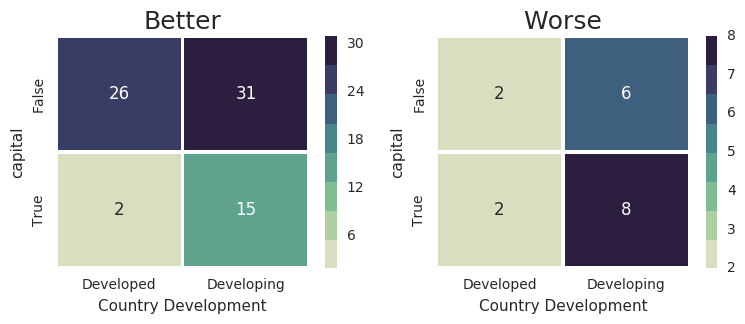

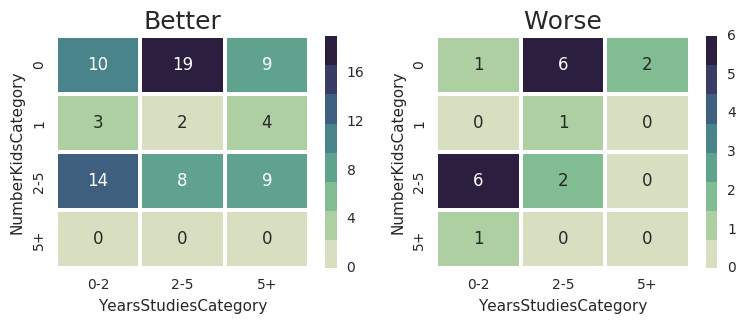

In [35]:
df_better = df_32[df_32['32'] == 'Better']
df_worse = df_32[df_32['32'] == 'Worse']

#typeAnswer : Better/Worse in the case of Q32
def plotDualAttributeHeatmap(cat1, cat2):
    df_1_cross = pd.crosstab(index=df_better[cat1], columns=df_better[cat2])
    df_2_cross = pd.crosstab(index=df_worse[cat1], columns=df_worse[cat2])
    fig, axarr = plt.subplots(1, 2, figsize=(9, 3))
    drawHeatmapSimpleAx(df_1_cross,5,4,True,axarr,0)
    drawHeatmapSimpleAx(df_2_cross,5,4,True,axarr,1)
    axarr[0].set_title('Better', fontsize=18)
    axarr[1].set_title('Worse', fontsize=18)

plotDualAttributeHeatmap('populationCategory', 'AgeCategory')
plotDualAttributeHeatmap('capital', 'Country Development')
plotDualAttributeHeatmap('NumberKidsCategory', 'YearsStudiesCategory')